# **전체 데이터를 활용한 모델 성능 비교**

In [2]:
import torch
import torch.nn as nn
import numpy as np
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.tensorboard import SummaryWriter
from tqdm import tqdm
from traincopy import *
from ADL_final import *
from cosine_annealing_warmup import CosineAnnealingWarmupRestarts

#from AgeModels3_weight_Gender import *

In [3]:
import importlib
import traincopy
importlib.reload(traincopy)
from traincopy import *

## **0. 데이터 불러오기**

In [4]:
# Train Set

dataset = AudioData(file='csv/train2.pkl', shuffle=True, sample_num=100000, mode=Mode.MULTITASK, train=Train.TRAIN)

  2%|▋                                    | 1952/100000 [00:52<49:26, 33.06it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13573-02-01-WON.MINJI-F-09-A.pt'


  4%|█▍                                   | 3728/100000 [01:38<31:47, 50.47it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13481-02-01-WON.MINJI-F-09-A.pt'


  6%|██▏                                  | 5860/100000 [02:33<32:51, 47.76it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13067-02-01-WON.MINJI-F-09-A.pt'


  7%|██▌                                  | 6839/100000 [03:04<47:53, 32.42it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13545-02-01-WON.MINJI-F-09-A.pt'


  9%|███▏                                 | 8753/100000 [03:54<48:48, 31.16it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13038-02-01-WON.MINJI-F-09-A.pt'


  9%|███▎                                 | 9016/100000 [04:01<34:46, 43.60it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13852-02-01-WON.MINJI-F-09-A.pt'


 10%|███▌                                | 10021/100000 [04:27<35:43, 41.97it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13091-02-01-WON.MINJI-F-09-A.pt'


 12%|████▍                               | 12318/100000 [05:28<37:47, 38.66it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13531-02-01-WON.MINJI-F-09-A.pt'


 15%|█████▌                              | 15359/100000 [06:45<30:30, 46.25it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13105-02-01-WON.MINJI-F-09-A.pt'
[Errno 2] No such file or directory: 'pt/train/o_0986-13062-02-01-WON.MINJI-F-09-A.pt'


 17%|██████▏                             | 17193/100000 [07:32<41:01, 33.64it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13205-02-01-WON.MINJI-F-09-A.pt'


 18%|██████▌                             | 18395/100000 [08:04<42:19, 32.13it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13593-02-01-WON.MINJI-F-09-A.pt'


 21%|███████▍                            | 20736/100000 [09:07<38:26, 34.36it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13376-02-01-WON.MINJI-F-09-A.pt'


 24%|████████▍                           | 23525/100000 [10:18<26:21, 48.36it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13700-02-01-WON.MINJI-F-09-A.pt'


 24%|████████▊                           | 24332/100000 [10:38<35:12, 35.81it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13063-02-01-WON.MINJI-F-09-A.pt'


 25%|█████████                           | 25030/100000 [10:58<32:51, 38.02it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13466-02-01-WON.MINJI-F-09-A.pt'


 26%|█████████▍                          | 26352/100000 [11:34<31:58, 38.39it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13143-02-01-WON.MINJI-F-09-A.pt'


 27%|█████████▊                          | 27171/100000 [11:55<30:23, 39.95it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13794-02-01-WON.MINJI-F-09-A.pt'


 27%|█████████▊                          | 27382/100000 [12:00<32:23, 37.37it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13889-02-01-WON.MINJI-F-09-A.pt'


 28%|██████████                          | 27836/100000 [12:12<32:41, 36.80it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13184-02-01-WON.MINJI-F-09-A.pt'


 29%|██████████▎                         | 28517/100000 [12:29<29:24, 40.52it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13158-02-01-WON.MINJI-F-09-A.pt'


 31%|███████████                         | 30646/100000 [13:27<31:06, 37.15it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13521-02-01-WON.MINJI-F-09-A.pt'


 31%|███████████▏                        | 30950/100000 [13:35<21:11, 54.29it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13208-02-01-WON.MINJI-F-09-A.pt'


 32%|███████████▎                        | 31506/100000 [13:50<24:51, 45.91it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13938-02-01-WON.MINJI-F-09-A.pt'


 32%|███████████▋                        | 32380/100000 [14:13<24:55, 45.21it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13930-02-01-WON.MINJI-F-09-A.pt'


 35%|████████████▌                       | 34775/100000 [15:21<32:00, 33.96it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13569-02-01-WON.MINJI-F-09-A.pt'


 37%|█████████████▎                      | 36940/100000 [16:18<34:58, 30.05it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13629-02-01-WON.MINJI-F-09-A.pt'


 38%|█████████████▌                      | 37657/100000 [16:38<20:57, 49.59it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13016-02-01-WON.MINJI-F-09-A.pt'


 38%|█████████████▋                      | 37962/100000 [16:47<21:38, 47.78it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13972-02-01-WON.MINJI-F-09-A.pt'


 40%|██████████████▌                     | 40443/100000 [17:52<28:14, 35.14it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13145-02-01-WON.MINJI-F-09-A.pt'


 46%|████████████████▌                   | 46004/100000 [20:23<22:51, 39.38it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13483-02-01-WON.MINJI-F-09-A.pt'


 52%|██████████████████▋                 | 52019/100000 [23:06<22:17, 35.88it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13524-02-01-WON.MINJI-F-09-A.pt'


 53%|██████████████████▉                 | 52742/100000 [23:25<18:52, 41.74it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13073-02-01-WON.MINJI-F-09-A.pt'


 53%|███████████████████                 | 53025/100000 [23:32<15:29, 50.55it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13643-02-01-WON.MINJI-F-09-A.pt'


 53%|███████████████████▏                | 53158/100000 [23:36<18:33, 42.06it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13237-02-01-WON.MINJI-F-09-A.pt'


 54%|███████████████████▌                | 54207/100000 [24:05<26:42, 28.57it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13858-02-01-WON.MINJI-F-09-A.pt'


 56%|████████████████████▎               | 56368/100000 [25:05<18:37, 39.06it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13293-02-01-WON.MINJI-F-09-A.pt'


 65%|███████████████████████▎            | 64688/100000 [28:45<19:12, 30.64it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13002-02-01-WON.MINJI-F-09-A.pt'


 67%|████████████████████████            | 66684/100000 [29:38<12:47, 43.40it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13759-02-01-WON.MINJI-F-09-A.pt'


 67%|████████████████████████▎           | 67440/100000 [29:59<18:26, 29.44it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13349-02-01-WON.MINJI-F-09-A.pt'


 71%|█████████████████████████▌          | 70927/100000 [31:28<09:21, 51.75it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13153-02-01-WON.MINJI-F-09-A.pt'


 72%|█████████████████████████▋          | 71526/100000 [31:44<12:33, 37.76it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13395-02-01-WON.MINJI-F-09-A.pt'


 75%|██████████████████████████▉         | 74676/100000 [33:06<14:19, 29.46it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13641-02-01-WON.MINJI-F-09-A.pt'
[Errno 2] No such file or directory: 'pt/train/o_0986-13414-02-01-WON.MINJI-F-09-A.pt'


 75%|███████████████████████████         | 75099/100000 [33:19<12:50, 32.31it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13456-02-01-WON.MINJI-F-09-A.pt'


 76%|███████████████████████████▍        | 76060/100000 [33:44<10:19, 38.63it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13489-02-01-WON.MINJI-F-09-A.pt'


 77%|███████████████████████████▋        | 76932/100000 [34:07<10:33, 36.43it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13010-02-01-WON.MINJI-F-09-A.pt'


 79%|████████████████████████████▎       | 78701/100000 [34:55<08:57, 39.60it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13895-02-01-WON.MINJI-F-09-A.pt'


 80%|████████████████████████████▊       | 80132/100000 [35:31<07:15, 45.66it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13163-02-01-WON.MINJI-F-09-A.pt'


 81%|█████████████████████████████       | 80593/100000 [35:43<08:35, 37.67it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13431-02-01-WON.MINJI-F-09-A.pt'


 81%|█████████████████████████████▏      | 80952/100000 [35:52<09:23, 33.81it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13839-02-01-WON.MINJI-F-09-A.pt'


 84%|██████████████████████████████▎     | 84312/100000 [37:19<04:53, 53.48it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13550-02-01-WON.MINJI-F-09-A.pt'


 91%|████████████████████████████████▋   | 90901/100000 [40:24<06:29, 23.35it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13476-02-01-WON.MINJI-F-09-A.pt'


 92%|█████████████████████████████████   | 91920/100000 [40:56<04:11, 32.12it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13412-02-01-WON.MINJI-F-09-A.pt'


 97%|██████████████████████████████████▉ | 96972/100000 [43:23<01:42, 29.46it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13607-02-01-WON.MINJI-F-09-A.pt'


 98%|███████████████████████████████████▏| 97893/100000 [43:46<01:02, 33.76it/s]

[Errno 2] No such file or directory: 'pt/train/o_0986-13436-02-01-WON.MINJI-F-09-A.pt'


100%|███████████████████████████████████| 100000/100000 [44:40<00:00, 37.30it/s]


In [5]:
# Valid Set

dataset_valid = AudioData(file='csv/validation2.pkl', shuffle=True, sample_num=20000, mode=Mode.MULTITASK, train=Train.VAL)

 15%|█████▌                                | 2938/20000 [01:49<08:17, 34.28it/s]

[Errno 2] No such file or directory: 'pt/validation/일반남녀_일반통합05_M_jeong.lee.0416_56_수도권_실내_07555.pt'


 23%|████████▋                             | 4579/20000 [02:42<08:01, 32.06it/s]

[Errno 2] No such file or directory: 'pt/validation/일반남녀_일반통합05_M_jeong.lee.0416_56_수도권_실내_06861.pt'


 33%|████████████▍                         | 6563/20000 [03:44<07:08, 31.34it/s]

[Errno 2] No such file or directory: 'pt/validation/일반남녀_일반통합05_M_jeong.lee.0416_56_수도권_실내_08603.pt'


 37%|██████████████                        | 7422/20000 [04:09<06:14, 33.55it/s]

[Errno 2] No such file or directory: 'pt/validation/일반남녀_일반통합05_M_jeong.lee.0416_56_수도권_실내_06766.pt'


 43%|████████████████▎                     | 8608/20000 [04:44<05:50, 32.50it/s]

[Errno 2] No such file or directory: 'pt/validation/일반남녀_일반통합05_M_jeong.lee.0416_56_수도권_실내_07388.pt'


 50%|██████████████████▋                  | 10098/20000 [05:30<04:41, 35.18it/s]

[Errno 2] No such file or directory: 'pt/validation/일반남녀_일반통합05_M_jeong.lee.0416_56_수도권_실내_07616.pt'


 51%|███████████████████                  | 10278/20000 [05:35<04:51, 33.37it/s]

[Errno 2] No such file or directory: 'pt/validation/일반남녀_일반통합05_M_jeong.lee.0416_56_수도권_실내_09022.pt'


 61%|██████████████████████▋              | 12234/20000 [06:30<03:18, 39.12it/s]

[Errno 2] No such file or directory: 'pt/validation/일반남녀_일반통합05_M_jeong.lee.0416_56_수도권_실내_07039.pt'


 62%|██████████████████████▊              | 12346/20000 [06:33<04:03, 31.40it/s]

[Errno 2] No such file or directory: 'pt/validation/일반남녀_일반통합05_M_jeong.lee.0416_56_수도권_실내_08655.pt'


 63%|███████████████████████▏             | 12501/20000 [06:37<03:41, 33.86it/s]

[Errno 2] No such file or directory: 'pt/validation/일반남녀_일반통합05_M_jeong.lee.0416_56_수도권_실내_08618.pt'


 79%|█████████████████████████████▏       | 15786/20000 [08:13<02:09, 32.61it/s]

[Errno 2] No such file or directory: 'pt/validation/DCEX20020164_HS200102.pt'


 83%|██████████████████████████████▊      | 16648/20000 [08:41<02:24, 23.14it/s]

[Errno 2] No such file or directory: 'pt/validation/일반남녀_일반통합05_M_jeong.lee.0416_56_수도권_실내_09268.pt'


 93%|██████████████████████████████████▎  | 18566/20000 [09:49<00:41, 34.75it/s]

[Errno 2] No such file or directory: 'pt/validation/일반남녀_일반통합05_M_jeong.lee.0416_56_수도권_실내_09239.pt'


 95%|███████████████████████████████████  | 18975/20000 [10:03<00:23, 43.45it/s]

[Errno 2] No such file or directory: 'pt/validation/일반남녀_일반통합05_M_jeong.lee.0416_56_수도권_실내_08389.pt'


100%|█████████████████████████████████████| 20000/20000 [10:38<00:00, 31.33it/s]


In [211]:
# Data Loader 설정

batch_num = 128 # batch size 지정
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_num, pin_memory=True, drop_last=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_num, pin_memory=True, drop_last=True)

In [166]:
age = {'청소년': 0, '청년': 0, '중장년': 0, '노년': 0}
gender = {'여성': 0, '남성': 0}
dialect = {'수도권': 0, '전라도': 0, '경상도': 0, '충청도': 0, '강원도': 0, '제주도': 0}

for dict in dataset_valid:
    if dict['label'][0] == 0:
        age['청소년'] += 1
    elif dict['label'][0] == 1:
        age['청년'] += 1
    elif dict['label'][0] == 2:
        age['중장년'] += 1
    elif dict['label'][0] == 3:
        age['노년'] += 1
            
    if dict['label'][1] == 0:
        gender['여성'] += 1
    elif dict['label'][1] == 1:
        gender['남성'] += 1
        
    if dict['label'][2] == 0:
        dialect['수도권'] += 1
    elif dict['label'][2] == 1:
        dialect['전라도'] += 1
    elif dict['label'][2] == 2:
        dialect['경상도'] += 1
    elif dict['label'][2] == 3:
        dialect['충청도'] += 1
    elif dict['label'][2] == 4:
        dialect['강원도'] += 1
    elif dict['label'][2] == 5:
        dialect['제주도'] += 1

In [167]:
print(age)
print(gender)
print(dialect)

{'청소년': 952, '청년': 3071, '중장년': 4219, '노년': 6020}
{'여성': 8163, '남성': 6099}
{'수도권': 9235, '전라도': 987, '경상도': 2398, '충청도': 962, '강원도': 574, '제주도': 106}


## **1. Multi-Class Multi-Output Model 학습 결과**

### **1-1) Shared-CNN (1차 실험)**

In [163]:
# Hyperparameter 설정

learning_rate = 2e-5
model = Shared_CNN()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, threshold=5e-5)
writer = SummaryWriter('/root/runs/CLSTM')

  0%|                                                   | 0/100 [00:00<?, ?it/s]


Checking accuracy on train set
Age     : Got 305724 / 634112 correct (48.21)
Accuracy of  청소년 : 48 %
Accuracy of   청년 : 27 %
Accuracy of  중장년 : 28 %
Accuracy of   노년 : 51 %
Gender  : Got 534399 / 634112 correct (84.28)
Accuracy of   여성 : 84 %
Accuracy of   남성 : 83 %
Dialect : Got 214003 / 634112 correct (33.75)
Accuracy of  수도권 : 52 %
Accuracy of  전라도 : 26 %
Accuracy of  경상도 :  2 %
Accuracy of  충청도 : 27 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000062초 (per input)


Checking accuracy on validation set


  1%|▍                                       | 1/100 [03:41<6:05:14, 221.36s/it]

Age     : Got 5367 / 14208 correct (37.77)
Accuracy of  청소년 : 23 %
Accuracy of   청년 : 15 %
Accuracy of  중장년 : 16 %
Accuracy of   노년 : 66 %
Gender  : Got 12010 / 14208 correct (84.53)
Accuracy of   여성 : 91 %
Accuracy of   남성 : 75 %
Dialect : Got 5409 / 14208 correct (38.07)
Accuracy of  수도권 : 52 %
Accuracy of  전라도 : 32 %
Accuracy of  경상도 :  3 %
Accuracy of  충청도 : 15 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000051초 (per input)



 99%|███████████████████████████████████████▌| 99/100 [2:12:16<01:19, 79.19s/it]


Checking accuracy on train set
Age     : Got 420829 / 634112 correct (66.37)
Accuracy of  청소년 : 83 %
Accuracy of   청년 : 64 %
Accuracy of  중장년 : 59 %
Accuracy of   노년 : 66 %
Gender  : Got 608255 / 634112 correct (95.92)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 95 %
Dialect : Got 273134 / 634112 correct (43.07)
Accuracy of  수도권 : 55 %
Accuracy of  전라도 : 30 %
Accuracy of  경상도 : 24 %
Accuracy of  충청도 : 45 %
Accuracy of  강원도 :  4 %
Accuracy of  제주도 :  0 %

Duration : 0.00000057초 (per input)


Checking accuracy on validation set


100%|███████████████████████████████████████| 100/100 [2:15:41<00:00, 81.41s/it]

Age     : Got 6268 / 14208 correct (44.12)
Accuracy of  청소년 : 15 %
Accuracy of   청년 : 44 %
Accuracy of  중장년 : 18 %
Accuracy of   노년 : 66 %
Gender  : Got 12378 / 14208 correct (87.12)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 75 %
Dialect : Got 5909 / 14208 correct (41.59)
Accuracy of  수도권 : 56 %
Accuracy of  전라도 : 19 %
Accuracy of  경상도 : 13 %
Accuracy of  충청도 : 19 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000058초 (per input)



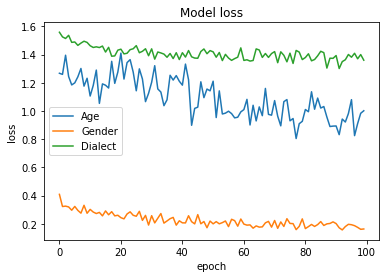

None


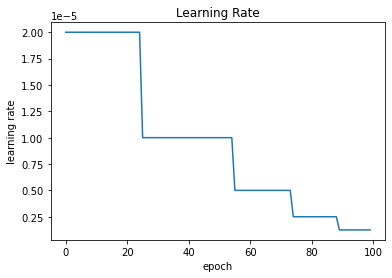

None


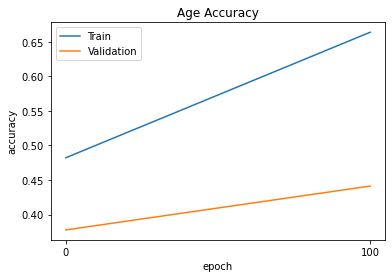

None


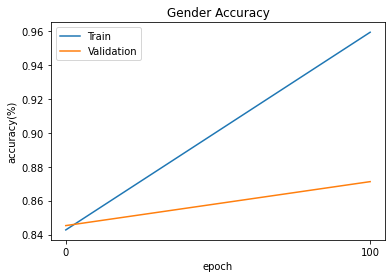

None


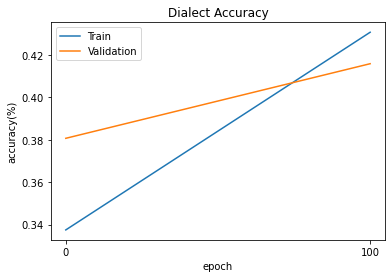

None


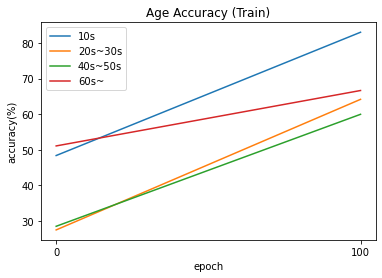

None


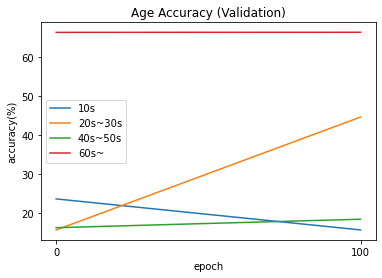

None


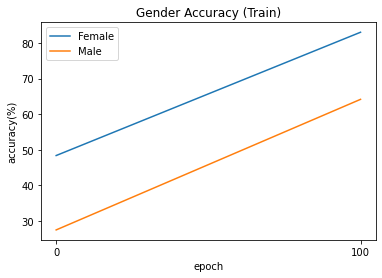

None


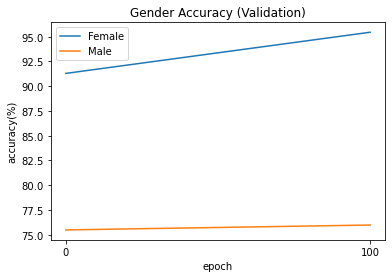

None


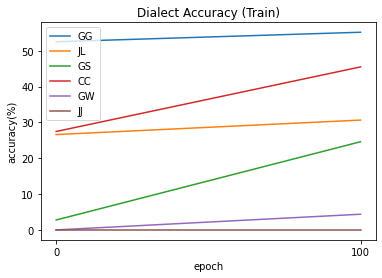

None


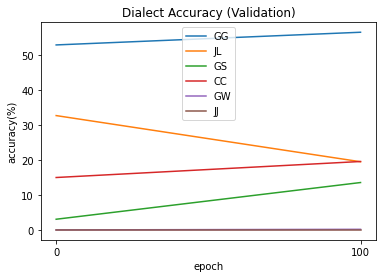

None
Mean Duration for Training per epoch = 78.7540초

---- FINISHED!! ----


In [165]:
# Shared CNN 학습

train(model=model, loader_train=dataloader, loader_valid=dataloader_valid, scheduler=scheduler, 
      tb_path=writer, optimizer=optimizer, epochs=100, batch_size=batch_num, model_name="HPS_CNN_SGD", print_every=100)

Iteration 1 --- Train Loss = 8.0559 --- Age Loss = 2.7688 --- Gender Loss = 1.6958 --- Dialect Loss = 3.5913
Iteration 1001 --- Train Loss = 3.3719 --- Age Loss = 1.1893 --- Gender Loss = 0.6465 --- Dialect Loss = 1.5361
Iteration 2001 --- Train Loss = 3.3859 --- Age Loss = 1.3792 --- Gender Loss = 0.5689 --- Dialect Loss = 1.4378
Iteration 3001 --- Train Loss = 3.2318 --- Age Loss = 1.2608 --- Gender Loss = 0.4871 --- Dialect Loss = 1.4838
Iteration 4001 --- Train Loss = 3.0417 --- Age Loss = 1.2113 --- Gender Loss = 0.3173 --- Dialect Loss = 1.5131
Current Learning Rate :  2e-05
Epoch 1 finished --- Duration : 88.9764초

Checking accuracy on train set
Age     : Got 255374 / 634112 correct (40.27)
Accuracy of  청소년 : 26 %
Accuracy of   청년 :  0 %
Accuracy of  중장년 : 72 %
Accuracy of   노년 : 40 %
Gender  : Got 544802 / 634112 correct (85.92)
Accuracy of   여성 : 86 %
Accuracy of   남성 : 84 %
Dialect : Got 343208 / 634112 correct (54.12)
Accuracy of  수도권 : 99 %
Accuracy of  전라도 :  0 %
Accuracy 

Iteration 2001 --- Train Loss = 2.8558 --- Age Loss = 1.2169 --- Gender Loss = 0.2711 --- Dialect Loss = 1.3677
Iteration 3001 --- Train Loss = 2.8525 --- Age Loss = 1.1558 --- Gender Loss = 0.2392 --- Dialect Loss = 1.4575
Iteration 4001 --- Train Loss = 2.8864 --- Age Loss = 1.1212 --- Gender Loss = 0.2263 --- Dialect Loss = 1.5389
Current Learning Rate :  2e-05
Epoch 6 finished --- Duration : 92.7109초

Checking accuracy on train set
Age     : Got 295803 / 634112 correct (46.65)
Accuracy of  청소년 : 46 %
Accuracy of   청년 :  9 %
Accuracy of  중장년 : 68 %
Accuracy of   노년 : 47 %
Gender  : Got 575755 / 634112 correct (90.80)
Accuracy of   여성 : 91 %
Accuracy of   남성 : 90 %
Dialect : Got 343342 / 634112 correct (54.15)
Accuracy of  수도권 : 99 %
Accuracy of  전라도 :  0 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.000018초 (per input)


Checking accuracy on validation set
Age     : Got 5581 / 14208 correct (39.28)
Accuracy of  청소년 : 

Iteration 4001 --- Train Loss = 2.8001 --- Age Loss = 1.1460 --- Gender Loss = 0.1443 --- Dialect Loss = 1.5098
Current Learning Rate :  2e-05
Epoch 11 finished --- Duration : 92.3746초

Checking accuracy on train set
Age     : Got 304421 / 634112 correct (48.01)
Accuracy of  청소년 : 63 %
Accuracy of   청년 : 17 %
Accuracy of  중장년 : 64 %
Accuracy of   노년 : 48 %
Gender  : Got 585215 / 634112 correct (92.29)
Accuracy of   여성 : 91 %
Accuracy of   남성 : 93 %
Dialect : Got 340081 / 634112 correct (53.63)
Accuracy of  수도권 : 93 %
Accuracy of  전라도 :  0 %
Accuracy of  경상도 :  9 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.000018초 (per input)


Checking accuracy on validation set
Age     : Got 5676 / 14208 correct (39.95)
Accuracy of  청소년 : 39 %
Accuracy of   청년 : 11 %
Accuracy of  중장년 : 34 %
Accuracy of   노년 : 58 %
Gender  : Got 11700 / 14208 correct (82.35)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 65 %
Dialect : Got 8861 / 14208 correct (62.37)
Accuracy of

Age     : Got 340381 / 634112 correct (53.68)
Accuracy of  청소년 : 63 %
Accuracy of   청년 : 21 %
Accuracy of  중장년 : 67 %
Accuracy of   노년 : 54 %
Gender  : Got 592433 / 634112 correct (93.43)
Accuracy of   여성 : 93 %
Accuracy of   남성 : 93 %
Dialect : Got 340407 / 634112 correct (53.68)
Accuracy of  수도권 : 89 %
Accuracy of  전라도 :  0 %
Accuracy of  경상도 : 17 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.000018초 (per input)


Checking accuracy on validation set
Age     : Got 5891 / 14208 correct (41.46)
Accuracy of  청소년 : 43 %
Accuracy of   청년 : 17 %
Accuracy of  중장년 : 32 %
Accuracy of   노년 : 59 %
Gender  : Got 11875 / 14208 correct (83.58)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 67 %
Dialect : Got 8576 / 14208 correct (60.36)
Accuracy of  수도권 : 90 %
Accuracy of  전라도 :  0 %
Accuracy of  경상도 : 12 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.000017초 (per input)

Iteration 1 --- Train Loss = 2.6255 --- Age Loss 

Age     : Got 5802 / 14208 correct (40.84)
Accuracy of  청소년 : 50 %
Accuracy of   청년 : 20 %
Accuracy of  중장년 : 30 %
Accuracy of   노년 : 57 %
Gender  : Got 11904 / 14208 correct (83.78)
Accuracy of   여성 : 96 %
Accuracy of   남성 : 67 %
Dialect : Got 8496 / 14208 correct (59.80)
Accuracy of  수도권 : 88 %
Accuracy of  전라도 :  2 %
Accuracy of  경상도 : 14 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.000017초 (per input)

Iteration 1 --- Train Loss = 2.5794 --- Age Loss = 0.9538 --- Gender Loss = 0.1865 --- Dialect Loss = 1.4390
Iteration 1001 --- Train Loss = 2.4602 --- Age Loss = 0.8169 --- Gender Loss = 0.2282 --- Dialect Loss = 1.4150
Iteration 2001 --- Train Loss = 2.5532 --- Age Loss = 1.0505 --- Gender Loss = 0.1814 --- Dialect Loss = 1.3214
Iteration 3001 --- Train Loss = 2.5415 --- Age Loss = 0.8489 --- Gender Loss = 0.2637 --- Dialect Loss = 1.4289
Iteration 4001 --- Train Loss = 2.6548 --- Age Loss = 1.0492 --- Gender Loss = 0.1419 --- Dialect Loss

Iteration 1001 --- Train Loss = 2.4634 --- Age Loss = 0.8223 --- Gender Loss = 0.2441 --- Dialect Loss = 1.3969
Iteration 2001 --- Train Loss = 2.5055 --- Age Loss = 1.0134 --- Gender Loss = 0.1888 --- Dialect Loss = 1.3032
Iteration 3001 --- Train Loss = 2.3620 --- Age Loss = 0.7268 --- Gender Loss = 0.2207 --- Dialect Loss = 1.4145
Iteration 4001 --- Train Loss = 2.5539 --- Age Loss = 0.9877 --- Gender Loss = 0.1246 --- Dialect Loss = 1.4416
Current Learning Rate :  2e-05
Epoch 27 finished --- Duration : 91.6481초

Checking accuracy on train set
Age     : Got 391114 / 634112 correct (61.68)
Accuracy of  청소년 : 65 %
Accuracy of   청년 : 23 %
Accuracy of  중장년 : 73 %
Accuracy of   노년 : 63 %
Gender  : Got 602167 / 634112 correct (94.96)
Accuracy of   여성 : 96 %
Accuracy of   남성 : 92 %
Dialect : Got 340717 / 634112 correct (53.73)
Accuracy of  수도권 : 82 %
Accuracy of  전라도 :  4 %
Accuracy of  경상도 : 30 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.000017초

Iteration 3001 --- Train Loss = 2.3951 --- Age Loss = 0.7956 --- Gender Loss = 0.1954 --- Dialect Loss = 1.4041
Iteration 4001 --- Train Loss = 2.4984 --- Age Loss = 0.9006 --- Gender Loss = 0.1230 --- Dialect Loss = 1.4748
Current Learning Rate :  2e-05
Epoch 32 finished --- Duration : 94.0855초

Checking accuracy on train set
Age     : Got 363965 / 634112 correct (57.40)
Accuracy of  청소년 : 69 %
Accuracy of   청년 : 30 %
Accuracy of  중장년 : 78 %
Accuracy of   노년 : 57 %
Gender  : Got 603213 / 634112 correct (95.13)
Accuracy of   여성 : 97 %
Accuracy of   남성 : 91 %
Dialect : Got 342848 / 634112 correct (54.07)
Accuracy of  수도권 : 83 %
Accuracy of  전라도 :  6 %
Accuracy of  경상도 : 29 %
Accuracy of  충청도 :  1 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.000018초 (per input)


Checking accuracy on validation set
Age     : Got 5910 / 14208 correct (41.60)
Accuracy of  청소년 : 41 %
Accuracy of   청년 : 23 %
Accuracy of  중장년 : 32 %
Accuracy of   노년 : 57 %
Gender  : Got 11969 / 14208 correc

Current Learning Rate :  2e-05
Epoch 37 finished --- Duration : 91.5201초

Checking accuracy on train set
Age     : Got 381095 / 634112 correct (60.10)
Accuracy of  청소년 : 72 %
Accuracy of   청년 : 31 %
Accuracy of  중장년 : 77 %
Accuracy of   노년 : 60 %
Gender  : Got 604861 / 634112 correct (95.39)
Accuracy of   여성 : 97 %
Accuracy of   남성 : 92 %
Dialect : Got 339375 / 634112 correct (53.52)
Accuracy of  수도권 : 79 %
Accuracy of  전라도 : 10 %
Accuracy of  경상도 : 33 %
Accuracy of  충청도 :  4 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.000018초 (per input)


Checking accuracy on validation set
Age     : Got 6039 / 14208 correct (42.50)
Accuracy of  청소년 : 35 %
Accuracy of   청년 : 25 %
Accuracy of  중장년 : 30 %
Accuracy of   노년 : 61 %
Gender  : Got 12091 / 14208 correct (85.10)
Accuracy of   여성 : 96 %
Accuracy of   남성 : 70 %
Dialect : Got 8048 / 14208 correct (56.64)
Accuracy of  수도권 : 81 %
Accuracy of  전라도 :  7 %
Accuracy of  경상도 : 20 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Acc

Age     : Got 6158 / 14208 correct (43.34)
Accuracy of  청소년 : 30 %
Accuracy of   청년 : 28 %
Accuracy of  중장년 : 28 %
Accuracy of   노년 : 63 %
Gender  : Got 12348 / 14208 correct (86.91)
Accuracy of   여성 : 94 %
Accuracy of   남성 : 76 %
Dialect : Got 7989 / 14208 correct (56.23)
Accuracy of  수도권 : 80 %
Accuracy of  전라도 :  7 %
Accuracy of  경상도 : 22 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.000018초 (per input)

Iteration 1 --- Train Loss = 2.1826 --- Age Loss = 0.6505 --- Gender Loss = 0.1388 --- Dialect Loss = 1.3932
Iteration 1001 --- Train Loss = 2.4967 --- Age Loss = 0.8649 --- Gender Loss = 0.2067 --- Dialect Loss = 1.4252
Iteration 2001 --- Train Loss = 2.5800 --- Age Loss = 1.0914 --- Gender Loss = 0.1982 --- Dialect Loss = 1.2905
Iteration 3001 --- Train Loss = 2.4223 --- Age Loss = 0.8098 --- Gender Loss = 0.2297 --- Dialect Loss = 1.3828
Iteration 4001 --- Train Loss = 2.4022 --- Age Loss = 0.8432 --- Gender Loss = 0.0965 --- Dialect Loss

Iteration 1001 --- Train Loss = 2.3480 --- Age Loss = 0.7459 --- Gender Loss = 0.1878 --- Dialect Loss = 1.4143
Iteration 2001 --- Train Loss = 2.3712 --- Age Loss = 0.8936 --- Gender Loss = 0.1628 --- Dialect Loss = 1.3147
Iteration 3001 --- Train Loss = 2.3259 --- Age Loss = 0.6830 --- Gender Loss = 0.2055 --- Dialect Loss = 1.4375
Iteration 4001 --- Train Loss = 2.3698 --- Age Loss = 0.8234 --- Gender Loss = 0.0937 --- Dialect Loss = 1.4527
Current Learning Rate :  2e-05
Epoch 48 finished --- Duration : 94.1338초

Checking accuracy on train set
Age     : Got 382301 / 634112 correct (60.29)
Accuracy of  청소년 : 68 %
Accuracy of   청년 : 33 %
Accuracy of  중장년 : 82 %
Accuracy of   노년 : 60 %
Gender  : Got 606986 / 634112 correct (95.72)
Accuracy of   여성 : 97 %
Accuracy of   남성 : 92 %
Dialect : Got 336259 / 634112 correct (53.03)
Accuracy of  수도권 : 72 %
Accuracy of  전라도 : 12 %
Accuracy of  경상도 : 42 %
Accuracy of  충청도 :  8 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.000018초

Iteration 3001 --- Train Loss = 2.2075 --- Age Loss = 0.6327 --- Gender Loss = 0.1636 --- Dialect Loss = 1.4112
Iteration 4001 --- Train Loss = 2.4361 --- Age Loss = 0.9389 --- Gender Loss = 0.0716 --- Dialect Loss = 1.4256
Current Learning Rate :  2e-05
Epoch 53 finished --- Duration : 91.3864초

Checking accuracy on train set
Age     : Got 362038 / 634112 correct (57.09)
Accuracy of  청소년 : 67 %
Accuracy of   청년 : 34 %
Accuracy of  중장년 : 86 %
Accuracy of   노년 : 56 %
Gender  : Got 603647 / 634112 correct (95.20)
Accuracy of   여성 : 98 %
Accuracy of   남성 : 89 %
Dialect : Got 337934 / 634112 correct (53.29)
Accuracy of  수도권 : 71 %
Accuracy of  전라도 : 11 %
Accuracy of  경상도 : 45 %
Accuracy of  충청도 : 10 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.000017초 (per input)


Checking accuracy on validation set
Age     : Got 6018 / 14208 correct (42.36)
Accuracy of  청소년 : 22 %
Accuracy of   청년 : 29 %
Accuracy of  중장년 : 36 %
Accuracy of   노년 : 56 %
Gender  : Got 12073 / 14208 correc

Current Learning Rate :  2e-05
Epoch 58 finished --- Duration : 94.8517초

Checking accuracy on train set
Age     : Got 365007 / 634112 correct (57.56)
Accuracy of  청소년 : 76 %
Accuracy of   청년 : 43 %
Accuracy of  중장년 : 84 %
Accuracy of   노년 : 55 %
Gender  : Got 608323 / 634112 correct (95.93)
Accuracy of   여성 : 98 %
Accuracy of   남성 : 92 %
Dialect : Got 340446 / 634112 correct (53.69)
Accuracy of  수도권 : 72 %
Accuracy of  전라도 : 14 %
Accuracy of  경상도 : 42 %
Accuracy of  충청도 : 12 %
Accuracy of  강원도 :  1 %
Accuracy of  제주도 :  0 %

Duration : 0.000018초 (per input)


Checking accuracy on validation set
Age     : Got 5958 / 14208 correct (41.93)
Accuracy of  청소년 : 26 %
Accuracy of   청년 : 35 %
Accuracy of  중장년 : 33 %
Accuracy of   노년 : 53 %
Gender  : Got 12263 / 14208 correct (86.31)
Accuracy of   여성 : 96 %
Accuracy of   남성 : 72 %
Dialect : Got 7616 / 14208 correct (53.60)
Accuracy of  수도권 : 74 %
Accuracy of  전라도 :  7 %
Accuracy of  경상도 : 26 %
Accuracy of  충청도 :  4 %
Accuracy of  강원도 :  0 %
Acc

Age     : Got 6254 / 14208 correct (44.02)
Accuracy of  청소년 : 18 %
Accuracy of   청년 : 33 %
Accuracy of  중장년 : 30 %
Accuracy of   노년 : 63 %
Gender  : Got 12423 / 14208 correct (87.44)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 76 %
Dialect : Got 7419 / 14208 correct (52.22)
Accuracy of  수도권 : 71 %
Accuracy of  전라도 :  9 %
Accuracy of  경상도 : 27 %
Accuracy of  충청도 :  6 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.000018초 (per input)

Iteration 1 --- Train Loss = 2.0040 --- Age Loss = 0.5012 --- Gender Loss = 0.1109 --- Dialect Loss = 1.3919
Iteration 1001 --- Train Loss = 2.3524 --- Age Loss = 0.7895 --- Gender Loss = 0.1964 --- Dialect Loss = 1.3665
Iteration 2001 --- Train Loss = 2.5647 --- Age Loss = 1.0717 --- Gender Loss = 0.2099 --- Dialect Loss = 1.2832
Iteration 3001 --- Train Loss = 2.2608 --- Age Loss = 0.6899 --- Gender Loss = 0.1835 --- Dialect Loss = 1.3875
Iteration 4001 --- Train Loss = 2.1832 --- Age Loss = 0.7750 --- Gender Loss = 0.0817 --- Dialect Loss

Iteration 1001 --- Train Loss = 2.2608 --- Age Loss = 0.7341 --- Gender Loss = 0.1773 --- Dialect Loss = 1.3494
Iteration 2001 --- Train Loss = 2.6141 --- Age Loss = 1.1808 --- Gender Loss = 0.1766 --- Dialect Loss = 1.2567
Iteration 3001 --- Train Loss = 2.2789 --- Age Loss = 0.6925 --- Gender Loss = 0.2488 --- Dialect Loss = 1.3376
Iteration 4001 --- Train Loss = 2.2385 --- Age Loss = 0.7734 --- Gender Loss = 0.0698 --- Dialect Loss = 1.3953
Current Learning Rate :  2e-05
Epoch 69 finished --- Duration : 91.6654초

Checking accuracy on train set
Age     : Got 371402 / 634112 correct (58.57)
Accuracy of  청소년 : 79 %
Accuracy of   청년 : 44 %
Accuracy of  중장년 : 87 %
Accuracy of   노년 : 56 %
Gender  : Got 611619 / 634112 correct (96.45)
Accuracy of   여성 : 97 %
Accuracy of   남성 : 94 %
Dialect : Got 343553 / 634112 correct (54.18)
Accuracy of  수도권 : 73 %
Accuracy of  전라도 : 17 %
Accuracy of  경상도 : 40 %
Accuracy of  충청도 : 20 %
Accuracy of  강원도 :  3 %
Accuracy of  제주도 :  0 %

Duration : 0.000018초

Iteration 3001 --- Train Loss = 2.2258 --- Age Loss = 0.6647 --- Gender Loss = 0.2041 --- Dialect Loss = 1.3570
Iteration 4001 --- Train Loss = 2.2254 --- Age Loss = 0.7515 --- Gender Loss = 0.0830 --- Dialect Loss = 1.3908
Current Learning Rate :  2e-05
Epoch 74 finished --- Duration : 94.9037초

Checking accuracy on train set
Age     : Got 426309 / 634112 correct (67.23)
Accuracy of  청소년 : 71 %
Accuracy of   청년 : 39 %
Accuracy of  중장년 : 84 %
Accuracy of   노년 : 67 %
Gender  : Got 612503 / 634112 correct (96.59)
Accuracy of   여성 : 97 %
Accuracy of   남성 : 95 %
Dialect : Got 337497 / 634112 correct (53.22)
Accuracy of  수도권 : 66 %
Accuracy of  전라도 : 18 %
Accuracy of  경상도 : 50 %
Accuracy of  충청도 : 20 %
Accuracy of  강원도 :  4 %
Accuracy of  제주도 :  0 %

Duration : 0.000018초 (per input)


Checking accuracy on validation set
Age     : Got 6359 / 14208 correct (44.76)
Accuracy of  청소년 : 17 %
Accuracy of   청년 : 33 %
Accuracy of  중장년 : 30 %
Accuracy of   노년 : 65 %
Gender  : Got 12428 / 14208 correc

Current Learning Rate :  2e-05
Epoch 79 finished --- Duration : 93.7624초

Checking accuracy on train set
Age     : Got 411327 / 634112 correct (64.87)
Accuracy of  청소년 : 78 %
Accuracy of   청년 : 45 %
Accuracy of  중장년 : 86 %
Accuracy of   노년 : 64 %
Gender  : Got 612001 / 634112 correct (96.51)
Accuracy of   여성 : 98 %
Accuracy of   남성 : 93 %
Dialect : Got 341134 / 634112 correct (53.80)
Accuracy of  수도권 : 67 %
Accuracy of  전라도 : 20 %
Accuracy of  경상도 : 49 %
Accuracy of  충청도 : 20 %
Accuracy of  강원도 :  7 %
Accuracy of  제주도 :  0 %

Duration : 0.000018초 (per input)


Checking accuracy on validation set
Age     : Got 6238 / 14208 correct (43.90)
Accuracy of  청소년 : 17 %
Accuracy of   청년 : 35 %
Accuracy of  중장년 : 31 %
Accuracy of   노년 : 60 %
Gender  : Got 12397 / 14208 correct (87.25)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 75 %
Dialect : Got 6917 / 14208 correct (48.68)
Accuracy of  수도권 : 65 %
Accuracy of  전라도 :  9 %
Accuracy of  경상도 : 29 %
Accuracy of  충청도 : 12 %
Accuracy of  강원도 :  0 %
Acc

Age     : Got 6120 / 14208 correct (43.07)
Accuracy of  청소년 : 19 %
Accuracy of   청년 : 37 %
Accuracy of  중장년 : 32 %
Accuracy of   노년 : 57 %
Gender  : Got 12450 / 14208 correct (87.63)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 76 %
Dialect : Got 7080 / 14208 correct (49.83)
Accuracy of  수도권 : 67 %
Accuracy of  전라도 :  9 %
Accuracy of  경상도 : 26 %
Accuracy of  충청도 : 13 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.000018초 (per input)

Iteration 1 --- Train Loss = 1.9473 --- Age Loss = 0.5270 --- Gender Loss = 0.1179 --- Dialect Loss = 1.3024
Iteration 1001 --- Train Loss = 2.2189 --- Age Loss = 0.6605 --- Gender Loss = 0.2082 --- Dialect Loss = 1.3501
Iteration 2001 --- Train Loss = 2.1772 --- Age Loss = 0.7990 --- Gender Loss = 0.1385 --- Dialect Loss = 1.2396
Iteration 3001 --- Train Loss = 1.9648 --- Age Loss = 0.4731 --- Gender Loss = 0.1636 --- Dialect Loss = 1.3281
Iteration 4001 --- Train Loss = 2.1080 --- Age Loss = 0.6597 --- Gender Loss = 0.0740 --- Dialect Loss

Iteration 1001 --- Train Loss = 2.1526 --- Age Loss = 0.6136 --- Gender Loss = 0.2105 --- Dialect Loss = 1.3285
Iteration 2001 --- Train Loss = 2.2856 --- Age Loss = 0.8703 --- Gender Loss = 0.1940 --- Dialect Loss = 1.2214
Iteration 3001 --- Train Loss = 2.0912 --- Age Loss = 0.6156 --- Gender Loss = 0.1521 --- Dialect Loss = 1.3235
Iteration 4001 --- Train Loss = 2.1515 --- Age Loss = 0.8149 --- Gender Loss = 0.0643 --- Dialect Loss = 1.2723
Current Learning Rate :  2e-05
Epoch 90 finished --- Duration : 91.2009초

Checking accuracy on train set
Age     : Got 436711 / 634112 correct (68.87)
Accuracy of  청소년 : 86 %
Accuracy of   청년 : 51 %
Accuracy of  중장년 : 84 %
Accuracy of   노년 : 68 %
Gender  : Got 613350 / 634112 correct (96.73)
Accuracy of   여성 : 96 %
Accuracy of   남성 : 97 %
Dialect : Got 338737 / 634112 correct (53.42)
Accuracy of  수도권 : 63 %
Accuracy of  전라도 : 24 %
Accuracy of  경상도 : 51 %
Accuracy of  충청도 : 26 %
Accuracy of  강원도 : 10 %
Accuracy of  제주도 :  1 %

Duration : 0.000017초

Iteration 3001 --- Train Loss = 1.8953 --- Age Loss = 0.4662 --- Gender Loss = 0.1332 --- Dialect Loss = 1.2959
Iteration 4001 --- Train Loss = 2.1495 --- Age Loss = 0.6490 --- Gender Loss = 0.0651 --- Dialect Loss = 1.4354
Current Learning Rate :  2e-05
Epoch 95 finished --- Duration : 92.5810초

Checking accuracy on train set
Age     : Got 426718 / 634112 correct (67.29)
Accuracy of  청소년 : 81 %
Accuracy of   청년 : 47 %
Accuracy of  중장년 : 87 %
Accuracy of   노년 : 66 %
Gender  : Got 614924 / 634112 correct (96.97)
Accuracy of   여성 : 97 %
Accuracy of   남성 : 95 %
Dialect : Got 350148 / 634112 correct (55.22)
Accuracy of  수도권 : 69 %
Accuracy of  전라도 : 23 %
Accuracy of  경상도 : 48 %
Accuracy of  충청도 : 24 %
Accuracy of  강원도 : 14 %
Accuracy of  제주도 :  2 %

Duration : 0.000018초 (per input)


Checking accuracy on validation set
Age     : Got 6297 / 14208 correct (44.32)
Accuracy of  청소년 : 18 %
Accuracy of   청년 : 38 %
Accuracy of  중장년 : 30 %
Accuracy of   노년 : 60 %
Gender  : Got 12538 / 14208 correc

Current Learning Rate :  2e-05
Epoch 100 finished --- Duration : 91.7707초

Checking accuracy on train set
Age     : Got 459438 / 634112 correct (72.45)
Accuracy of  청소년 : 87 %
Accuracy of   청년 : 48 %
Accuracy of  중장년 : 83 %
Accuracy of   노년 : 72 %
Gender  : Got 613481 / 634112 correct (96.75)
Accuracy of   여성 : 96 %
Accuracy of   남성 : 97 %
Dialect : Got 342453 / 634112 correct (54.01)
Accuracy of  수도권 : 62 %
Accuracy of  전라도 : 24 %
Accuracy of  경상도 : 56 %
Accuracy of  충청도 : 24 %
Accuracy of  강원도 : 17 %
Accuracy of  제주도 :  2 %

Duration : 0.000017초 (per input)


Checking accuracy on validation set
Age     : Got 6468 / 14208 correct (45.52)
Accuracy of  청소년 : 17 %
Accuracy of   청년 : 37 %
Accuracy of  중장년 : 25 %
Accuracy of   노년 : 68 %
Gender  : Got 12526 / 14208 correct (88.16)
Accuracy of   여성 : 91 %
Accuracy of   남성 : 84 %
Dialect : Got 6662 / 14208 correct (46.89)
Accuracy of  수도권 : 61 %
Accuracy of  전라도 : 10 %
Accuracy of  경상도 : 32 %
Accuracy of  충청도 : 14 %
Accuracy of  강원도 :  0 %
Ac

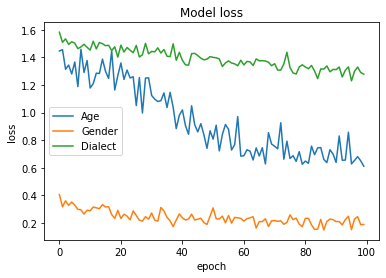

None


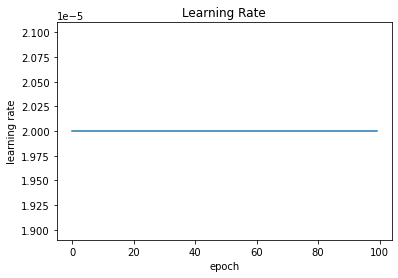

None


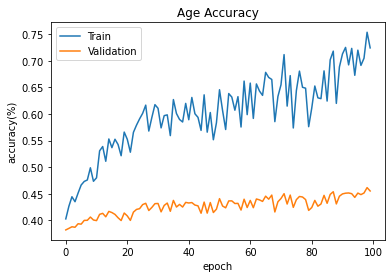

None


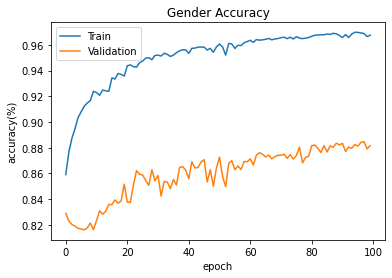

None


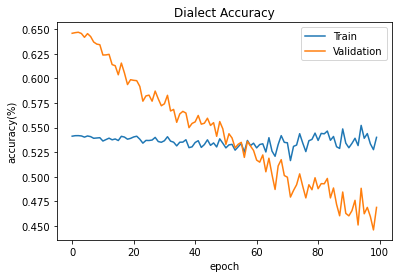

None


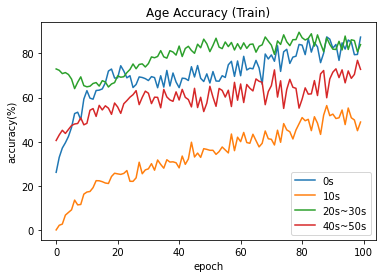

None


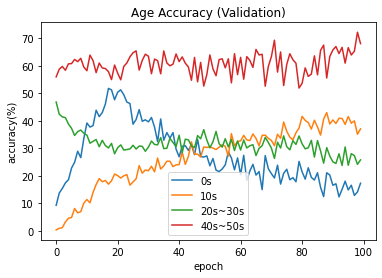

None


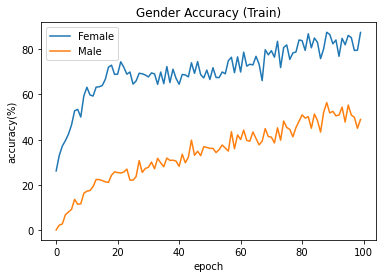

None


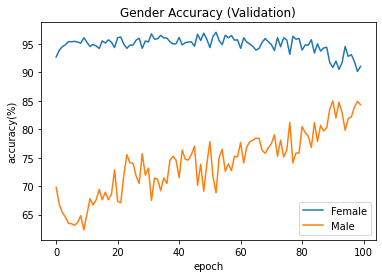

None


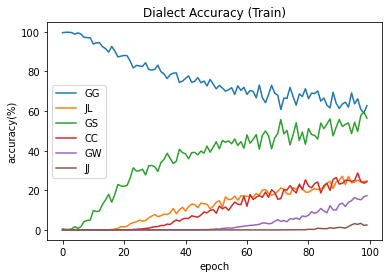

None


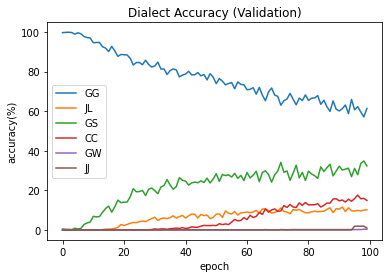

None
Mean Duration for Training per epoch = 92.6076초

---- FINISHED!! ----


In [26]:
# Shared CNN 학습

train(model=model, loader_train=dataloader, loader_valid=dataloader_valid, scheduler=scheduler, 
      tb_path=writer, optimizer=optimizer, epochs=100, batch_size=batch_num, model_name="HPS_CNN_SGD")

### **1-2) Shared-CNN (2차 실험)**

In [27]:
# Hyperparameter 설정

learning_rate = 2e-5
model = Shared_CNN()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, threshold=5e-5)
writer = SummaryWriter('/root/runs/CLSTM')

Iteration 1 --- Train Loss = 6.8008 --- Age Loss = 2.0332 --- Gender Loss = 1.5538 --- Dialect Loss = 3.2137
Iteration 1001 --- Train Loss = 3.1310 --- Age Loss = 1.1693 --- Gender Loss = 0.4626 --- Dialect Loss = 1.4992
Iteration 2001 --- Train Loss = 3.2091 --- Age Loss = 1.4314 --- Gender Loss = 0.3300 --- Dialect Loss = 1.4477
Iteration 3001 --- Train Loss = 3.0913 --- Age Loss = 1.2491 --- Gender Loss = 0.3215 --- Dialect Loss = 1.5207
Iteration 4001 --- Train Loss = 2.9498 --- Age Loss = 1.2765 --- Gender Loss = 0.1860 --- Dialect Loss = 1.4872
Current Learning Rate :  2e-05
Epoch 1 finished --- Duration : 105.7517초

Checking accuracy on train set
Age     : Got 308169 / 634112 correct (48.60)
Accuracy of  청소년 : 44 %
Accuracy of   청년 :  4 %
Accuracy of  중장년 : 66 %
Accuracy of   노년 : 50 %
Gender  : Got 585632 / 634112 correct (92.35)
Accuracy of   여성 : 92 %
Accuracy of   남성 : 92 %
Dialect : Got 283385 / 634112 correct (44.69)
Accuracy of  수도권 : 50 %
Accuracy of  전라도 :  0 %
Accuracy

Iteration 2001 --- Train Loss = 2.5325 --- Age Loss = 1.1017 --- Gender Loss = 0.1509 --- Dialect Loss = 1.2799
Iteration 3001 --- Train Loss = 2.5024 --- Age Loss = 0.9558 --- Gender Loss = 0.1670 --- Dialect Loss = 1.3796
Iteration 4001 --- Train Loss = 2.4648 --- Age Loss = 0.9541 --- Gender Loss = 0.1008 --- Dialect Loss = 1.4099
Current Learning Rate :  2e-05
Epoch 6 finished --- Duration : 104.8128초

Checking accuracy on train set
Age     : Got 370354 / 634112 correct (58.41)
Accuracy of  청소년 : 72 %
Accuracy of   청년 : 26 %
Accuracy of  중장년 : 70 %
Accuracy of   노년 : 59 %
Gender  : Got 612468 / 634112 correct (96.59)
Accuracy of   여성 : 97 %
Accuracy of   남성 : 95 %
Dialect : Got 321891 / 634112 correct (50.76)
Accuracy of  수도권 : 65 %
Accuracy of  전라도 : 17 %
Accuracy of  경상도 : 45 %
Accuracy of  충청도 : 14 %
Accuracy of  강원도 :  6 %
Accuracy of  제주도 :  0 %

Duration : 0.000018초 (per input)


Checking accuracy on validation set
Age     : Got 5959 / 14208 correct (41.94)
Accuracy of  청소년 :

Iteration 4001 --- Train Loss = 2.3999 --- Age Loss = 1.0002 --- Gender Loss = 0.0640 --- Dialect Loss = 1.3358
Current Learning Rate :  2e-05
Epoch 11 finished --- Duration : 106.3022초

Checking accuracy on train set
Age     : Got 393004 / 634112 correct (61.98)
Accuracy of  청소년 : 81 %
Accuracy of   청년 : 40 %
Accuracy of  중장년 : 78 %
Accuracy of   노년 : 61 %
Gender  : Got 618626 / 634112 correct (97.56)
Accuracy of   여성 : 97 %
Accuracy of   남성 : 97 %
Dialect : Got 338531 / 634112 correct (53.39)
Accuracy of  수도권 : 63 %
Accuracy of  전라도 : 28 %
Accuracy of  경상도 : 49 %
Accuracy of  충청도 : 30 %
Accuracy of  강원도 : 16 %
Accuracy of  제주도 :  5 %

Duration : 0.000017초 (per input)


Checking accuracy on validation set
Age     : Got 6115 / 14208 correct (43.04)
Accuracy of  청소년 : 29 %
Accuracy of   청년 : 23 %
Accuracy of  중장년 : 28 %
Accuracy of   노년 : 65 %
Gender  : Got 12035 / 14208 correct (84.71)
Accuracy of   여성 : 96 %
Accuracy of   남성 : 69 %
Dialect : Got 6810 / 14208 correct (47.93)
Accuracy o

Age     : Got 406868 / 634112 correct (64.16)
Accuracy of  청소년 : 87 %
Accuracy of   청년 : 47 %
Accuracy of  중장년 : 83 %
Accuracy of   노년 : 63 %
Gender  : Got 623353 / 634112 correct (98.30)
Accuracy of   여성 : 98 %
Accuracy of   남성 : 97 %
Dialect : Got 356221 / 634112 correct (56.18)
Accuracy of  수도권 : 65 %
Accuracy of  전라도 : 34 %
Accuracy of  경상도 : 51 %
Accuracy of  충청도 : 37 %
Accuracy of  강원도 : 26 %
Accuracy of  제주도 : 17 %

Duration : 0.000017초 (per input)


Checking accuracy on validation set
Age     : Got 6239 / 14208 correct (43.91)
Accuracy of  청소년 : 23 %
Accuracy of   청년 : 28 %
Accuracy of  중장년 : 28 %
Accuracy of   노년 : 66 %
Gender  : Got 11983 / 14208 correct (84.34)
Accuracy of   여성 : 96 %
Accuracy of   남성 : 67 %
Dialect : Got 6704 / 14208 correct (47.18)
Accuracy of  수도권 : 62 %
Accuracy of  전라도 : 14 %
Accuracy of  경상도 : 25 %
Accuracy of  충청도 : 17 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  2 %

Duration : 0.000017초 (per input)

Iteration 1 --- Train Loss = 1.8866 --- Age Loss 

Age     : Got 6390 / 14208 correct (44.97)
Accuracy of  청소년 : 17 %
Accuracy of   청년 : 32 %
Accuracy of  중장년 : 22 %
Accuracy of   노년 : 71 %
Gender  : Got 11953 / 14208 correct (84.13)
Accuracy of   여성 : 96 %
Accuracy of   남성 : 67 %
Dialect : Got 6872 / 14208 correct (48.37)
Accuracy of  수도권 : 63 %
Accuracy of  전라도 : 14 %
Accuracy of  경상도 : 29 %
Accuracy of  충청도 : 13 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  5 %

Duration : 0.000017초 (per input)

Iteration 1 --- Train Loss = 1.8505 --- Age Loss = 0.6145 --- Gender Loss = 0.0794 --- Dialect Loss = 1.1566
Iteration 1001 --- Train Loss = 1.9278 --- Age Loss = 0.5963 --- Gender Loss = 0.1099 --- Dialect Loss = 1.2215
Iteration 2001 --- Train Loss = 1.8669 --- Age Loss = 0.5414 --- Gender Loss = 0.0810 --- Dialect Loss = 1.2444
Iteration 3001 --- Train Loss = 1.8153 --- Age Loss = 0.5213 --- Gender Loss = 0.1035 --- Dialect Loss = 1.1905
Iteration 4001 --- Train Loss = 2.2443 --- Age Loss = 0.8426 --- Gender Loss = 0.0778 --- Dialect Loss

Iteration 1001 --- Train Loss = 1.8304 --- Age Loss = 0.5215 --- Gender Loss = 0.1029 --- Dialect Loss = 1.2060
Iteration 2001 --- Train Loss = 1.6973 --- Age Loss = 0.4987 --- Gender Loss = 0.0556 --- Dialect Loss = 1.1430
Iteration 3001 --- Train Loss = 1.6947 --- Age Loss = 0.5169 --- Gender Loss = 0.0726 --- Dialect Loss = 1.1052
Iteration 4001 --- Train Loss = 1.8491 --- Age Loss = 0.6291 --- Gender Loss = 0.0416 --- Dialect Loss = 1.1785
Current Learning Rate :  2e-05
Epoch 27 finished --- Duration : 105.9368초

Checking accuracy on train set
Age     : Got 439162 / 634112 correct (69.26)
Accuracy of  청소년 : 93 %
Accuracy of   청년 : 63 %
Accuracy of  중장년 : 87 %
Accuracy of   노년 : 67 %
Gender  : Got 626165 / 634112 correct (98.75)
Accuracy of   여성 : 98 %
Accuracy of   남성 : 99 %
Dialect : Got 372856 / 634112 correct (58.80)
Accuracy of  수도권 : 61 %
Accuracy of  전라도 : 46 %
Accuracy of  경상도 : 60 %
Accuracy of  충청도 : 51 %
Accuracy of  강원도 : 44 %
Accuracy of  제주도 : 52 %

Duration : 0.000017

Iteration 3001 --- Train Loss = 1.6796 --- Age Loss = 0.4082 --- Gender Loss = 0.0449 --- Dialect Loss = 1.2265
Iteration 4001 --- Train Loss = 1.9978 --- Age Loss = 0.6778 --- Gender Loss = 0.0763 --- Dialect Loss = 1.2437
Current Learning Rate :  2e-05
Epoch 32 finished --- Duration : 103.4140초

Checking accuracy on train set
Age     : Got 438620 / 634112 correct (69.17)
Accuracy of  청소년 : 97 %
Accuracy of   청년 : 65 %
Accuracy of  중장년 : 90 %
Accuracy of   노년 : 67 %
Gender  : Got 629984 / 634112 correct (99.35)
Accuracy of   여성 : 99 %
Accuracy of   남성 : 99 %
Dialect : Got 383801 / 634112 correct (60.53)
Accuracy of  수도권 : 62 %
Accuracy of  전라도 : 49 %
Accuracy of  경상도 : 62 %
Accuracy of  충청도 : 53 %
Accuracy of  강원도 : 49 %
Accuracy of  제주도 : 60 %

Duration : 0.000018초 (per input)


Checking accuracy on validation set
Age     : Got 6274 / 14208 correct (44.16)
Accuracy of  청소년 :  8 %
Accuracy of   청년 : 37 %
Accuracy of  중장년 : 24 %
Accuracy of   노년 : 66 %
Gender  : Got 11987 / 14208 corre

Current Learning Rate :  2e-05
Epoch 37 finished --- Duration : 104.8909초

Checking accuracy on train set
Age     : Got 461499 / 634112 correct (72.78)
Accuracy of  청소년 : 95 %
Accuracy of   청년 : 66 %
Accuracy of  중장년 : 90 %
Accuracy of   노년 : 71 %
Gender  : Got 630213 / 634112 correct (99.39)
Accuracy of   여성 : 99 %
Accuracy of   남성 : 99 %
Dialect : Got 383496 / 634112 correct (60.48)
Accuracy of  수도권 : 58 %
Accuracy of  전라도 : 51 %
Accuracy of  경상도 : 68 %
Accuracy of  충청도 : 58 %
Accuracy of  강원도 : 52 %
Accuracy of  제주도 : 62 %

Duration : 0.000017초 (per input)


Checking accuracy on validation set
Age     : Got 6482 / 14208 correct (45.62)
Accuracy of  청소년 :  6 %
Accuracy of   청년 : 34 %
Accuracy of  중장년 : 23 %
Accuracy of   노년 : 73 %
Gender  : Got 11995 / 14208 correct (84.42)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 69 %
Dialect : Got 6841 / 14208 correct (48.15)
Accuracy of  수도권 : 62 %
Accuracy of  전라도 : 12 %
Accuracy of  경상도 : 33 %
Accuracy of  충청도 : 14 %
Accuracy of  강원도 :  0 %
Ac

Age     : Got 6484 / 14208 correct (45.64)
Accuracy of  청소년 :  6 %
Accuracy of   청년 : 36 %
Accuracy of  중장년 : 21 %
Accuracy of   노년 : 73 %
Gender  : Got 12092 / 14208 correct (85.11)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 71 %
Dialect : Got 7118 / 14208 correct (50.10)
Accuracy of  수도권 : 67 %
Accuracy of  전라도 : 12 %
Accuracy of  경상도 : 28 %
Accuracy of  충청도 : 10 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  5 %

Duration : 0.000017초 (per input)

Iteration 1 --- Train Loss = 1.4400 --- Age Loss = 0.3556 --- Gender Loss = 0.0408 --- Dialect Loss = 1.0437
Iteration 1001 --- Train Loss = 1.5117 --- Age Loss = 0.4116 --- Gender Loss = 0.0068 --- Dialect Loss = 1.0932
Iteration 2001 --- Train Loss = 1.4706 --- Age Loss = 0.3523 --- Gender Loss = 0.0340 --- Dialect Loss = 1.0843
Iteration 3001 --- Train Loss = 1.6332 --- Age Loss = 0.3885 --- Gender Loss = 0.0392 --- Dialect Loss = 1.2056
Iteration 4001 --- Train Loss = 1.9050 --- Age Loss = 0.6423 --- Gender Loss = 0.0284 --- Dialect Loss

Iteration 1001 --- Train Loss = 1.6691 --- Age Loss = 0.4918 --- Gender Loss = 0.0087 --- Dialect Loss = 1.1686
Iteration 2001 --- Train Loss = 1.4398 --- Age Loss = 0.4096 --- Gender Loss = 0.0390 --- Dialect Loss = 0.9912
Iteration 3001 --- Train Loss = 1.6150 --- Age Loss = 0.4594 --- Gender Loss = 0.0116 --- Dialect Loss = 1.1441
Iteration 4001 --- Train Loss = 1.7214 --- Age Loss = 0.5567 --- Gender Loss = 0.0542 --- Dialect Loss = 1.1105
Current Learning Rate :  2e-05
Epoch 48 finished --- Duration : 103.7111초

Checking accuracy on train set
Age     : Got 466212 / 634112 correct (73.52)
Accuracy of  청소년 : 96 %
Accuracy of   청년 : 74 %
Accuracy of  중장년 : 94 %
Accuracy of   노년 : 71 %
Gender  : Got 631158 / 634112 correct (99.53)
Accuracy of   여성 : 99 %
Accuracy of   남성 : 99 %
Dialect : Got 402528 / 634112 correct (63.48)
Accuracy of  수도권 : 61 %
Accuracy of  전라도 : 65 %
Accuracy of  경상도 : 65 %
Accuracy of  충청도 : 63 %
Accuracy of  강원도 : 70 %
Accuracy of  제주도 : 72 %

Duration : 0.000018

Iteration 3001 --- Train Loss = 1.3465 --- Age Loss = 0.3471 --- Gender Loss = 0.0398 --- Dialect Loss = 0.9595
Iteration 4001 --- Train Loss = 1.4849 --- Age Loss = 0.4332 --- Gender Loss = 0.0160 --- Dialect Loss = 1.0358
Current Learning Rate :  2e-05
Epoch 53 finished --- Duration : 104.1432초

Checking accuracy on train set
Age     : Got 481633 / 634112 correct (75.95)
Accuracy of  청소년 : 99 %
Accuracy of   청년 : 78 %
Accuracy of  중장년 : 93 %
Accuracy of   노년 : 73 %
Gender  : Got 632621 / 634112 correct (99.76)
Accuracy of   여성 : 99 %
Accuracy of   남성 : 99 %
Dialect : Got 413661 / 634112 correct (65.23)
Accuracy of  수도권 : 65 %
Accuracy of  전라도 : 64 %
Accuracy of  경상도 : 64 %
Accuracy of  충청도 : 67 %
Accuracy of  강원도 : 75 %
Accuracy of  제주도 : 80 %

Duration : 0.000017초 (per input)


Checking accuracy on validation set
Age     : Got 6636 / 14208 correct (46.71)
Accuracy of  청소년 :  7 %
Accuracy of   청년 : 34 %
Accuracy of  중장년 : 20 %
Accuracy of   노년 : 77 %
Gender  : Got 11940 / 14208 corre

Current Learning Rate :  1e-05
Epoch 58 finished --- Duration : 105.6474초

Checking accuracy on train set
Age     : Got 495367 / 634112 correct (78.12)
Accuracy of  청소년 : 99 %
Accuracy of   청년 : 82 %
Accuracy of  중장년 : 94 %
Accuracy of   노년 : 76 %
Gender  : Got 633324 / 634112 correct (99.88)
Accuracy of   여성 : 99 %
Accuracy of   남성 : 99 %
Dialect : Got 414243 / 634112 correct (65.33)
Accuracy of  수도권 : 62 %
Accuracy of  전라도 : 71 %
Accuracy of  경상도 : 66 %
Accuracy of  충청도 : 72 %
Accuracy of  강원도 : 77 %
Accuracy of  제주도 : 83 %

Duration : 0.000017초 (per input)


Checking accuracy on validation set
Age     : Got 6693 / 14208 correct (47.11)
Accuracy of  청소년 :  5 %
Accuracy of   청년 : 36 %
Accuracy of  중장년 : 19 %
Accuracy of   노년 : 78 %
Gender  : Got 12020 / 14208 correct (84.60)
Accuracy of   여성 : 96 %
Accuracy of   남성 : 68 %
Dialect : Got 7062 / 14208 correct (49.70)
Accuracy of  수도권 : 66 %
Accuracy of  전라도 : 15 %
Accuracy of  경상도 : 29 %
Accuracy of  충청도 : 11 %
Accuracy of  강원도 :  0 %
Ac

Age     : Got 6637 / 14208 correct (46.71)
Accuracy of  청소년 :  6 %
Accuracy of   청년 : 35 %
Accuracy of  중장년 : 20 %
Accuracy of   노년 : 77 %
Gender  : Got 12060 / 14208 correct (84.88)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 70 %
Dialect : Got 7126 / 14208 correct (50.15)
Accuracy of  수도권 : 67 %
Accuracy of  전라도 : 13 %
Accuracy of  경상도 : 29 %
Accuracy of  충청도 : 10 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  3 %

Duration : 0.000017초 (per input)

Iteration 1 --- Train Loss = 1.2065 --- Age Loss = 0.2694 --- Gender Loss = 0.0041 --- Dialect Loss = 0.9329
Iteration 1001 --- Train Loss = 1.3727 --- Age Loss = 0.3070 --- Gender Loss = 0.0041 --- Dialect Loss = 1.0616
Iteration 2001 --- Train Loss = 1.1956 --- Age Loss = 0.3012 --- Gender Loss = 0.0086 --- Dialect Loss = 0.8858
Iteration 3001 --- Train Loss = 1.2801 --- Age Loss = 0.3588 --- Gender Loss = 0.0230 --- Dialect Loss = 0.8983
Iteration 4001 --- Train Loss = 1.5321 --- Age Loss = 0.4378 --- Gender Loss = 0.0083 --- Dialect Loss

Iteration 1001 --- Train Loss = 1.4500 --- Age Loss = 0.4489 --- Gender Loss = 0.0102 --- Dialect Loss = 0.9909
Iteration 2001 --- Train Loss = 1.2204 --- Age Loss = 0.2962 --- Gender Loss = 0.0044 --- Dialect Loss = 0.9198
Iteration 3001 --- Train Loss = 1.3233 --- Age Loss = 0.3578 --- Gender Loss = 0.0076 --- Dialect Loss = 0.9579
Iteration 4001 --- Train Loss = 1.3723 --- Age Loss = 0.3040 --- Gender Loss = 0.0051 --- Dialect Loss = 1.0632
Current Learning Rate :  1e-05
Epoch 69 finished --- Duration : 103.5315초

Checking accuracy on train set
Age     : Got 504673 / 634112 correct (79.59)
Accuracy of  청소년 : 99 %
Accuracy of   청년 : 85 %
Accuracy of  중장년 : 95 %
Accuracy of   노년 : 77 %
Gender  : Got 633617 / 634112 correct (99.92)
Accuracy of   여성 : 99 %
Accuracy of   남성 : 99 %
Dialect : Got 421135 / 634112 correct (66.41)
Accuracy of  수도권 : 62 %
Accuracy of  전라도 : 74 %
Accuracy of  경상도 : 68 %
Accuracy of  충청도 : 72 %
Accuracy of  강원도 : 82 %
Accuracy of  제주도 : 84 %

Duration : 0.000017

Iteration 3001 --- Train Loss = 1.3092 --- Age Loss = 0.3930 --- Gender Loss = 0.0206 --- Dialect Loss = 0.8957
Iteration 4001 --- Train Loss = 1.3584 --- Age Loss = 0.3469 --- Gender Loss = 0.0200 --- Dialect Loss = 0.9914
Current Learning Rate :  1e-05
Epoch 74 finished --- Duration : 103.1324초

Checking accuracy on train set
Age     : Got 511441 / 634112 correct (80.65)
Accuracy of  청소년 : 99 %
Accuracy of   청년 : 85 %
Accuracy of  중장년 : 96 %
Accuracy of   노년 : 78 %
Gender  : Got 633760 / 634112 correct (99.94)
Accuracy of   여성 : 99 %
Accuracy of   남성 : 99 %
Dialect : Got 427364 / 634112 correct (67.40)
Accuracy of  수도권 : 64 %
Accuracy of  전라도 : 76 %
Accuracy of  경상도 : 67 %
Accuracy of  충청도 : 76 %
Accuracy of  강원도 : 88 %
Accuracy of  제주도 : 89 %

Duration : 0.000017초 (per input)


Checking accuracy on validation set
Age     : Got 6716 / 14208 correct (47.27)
Accuracy of  청소년 :  5 %
Accuracy of   청년 : 32 %
Accuracy of  중장년 : 17 %
Accuracy of   노년 : 82 %
Gender  : Got 12037 / 14208 corre

Current Learning Rate :  5e-06
Epoch 79 finished --- Duration : 103.3256초

Checking accuracy on train set
Age     : Got 504028 / 634112 correct (79.49)
Accuracy of  청소년 : 99 %
Accuracy of   청년 : 87 %
Accuracy of  중장년 : 97 %
Accuracy of   노년 : 77 %
Gender  : Got 633872 / 634112 correct (99.96)
Accuracy of   여성 : 99 %
Accuracy of   남성 : 99 %
Dialect : Got 434120 / 634112 correct (68.46)
Accuracy of  수도권 : 67 %
Accuracy of  전라도 : 75 %
Accuracy of  경상도 : 65 %
Accuracy of  충청도 : 78 %
Accuracy of  강원도 : 86 %
Accuracy of  제주도 : 89 %

Duration : 0.000017초 (per input)


Checking accuracy on validation set
Age     : Got 6670 / 14208 correct (46.95)
Accuracy of  청소년 :  5 %
Accuracy of   청년 : 33 %
Accuracy of  중장년 : 18 %
Accuracy of   노년 : 80 %
Gender  : Got 12024 / 14208 correct (84.63)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 69 %
Dialect : Got 7246 / 14208 correct (51.00)
Accuracy of  수도권 : 69 %
Accuracy of  전라도 : 13 %
Accuracy of  경상도 : 26 %
Accuracy of  충청도 :  8 %
Accuracy of  강원도 :  0 %
Ac

Age     : Got 6728 / 14208 correct (47.35)
Accuracy of  청소년 :  4 %
Accuracy of   청년 : 33 %
Accuracy of  중장년 : 17 %
Accuracy of   노년 : 81 %
Gender  : Got 12019 / 14208 correct (84.59)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 69 %
Dialect : Got 7262 / 14208 correct (51.11)
Accuracy of  수도권 : 69 %
Accuracy of  전라도 : 13 %
Accuracy of  경상도 : 27 %
Accuracy of  충청도 :  8 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.000017초 (per input)

Iteration 1 --- Train Loss = 1.2311 --- Age Loss = 0.3655 --- Gender Loss = 0.0007 --- Dialect Loss = 0.8648
Iteration 1001 --- Train Loss = 1.3123 --- Age Loss = 0.2483 --- Gender Loss = 0.0145 --- Dialect Loss = 1.0494
Iteration 2001 --- Train Loss = 1.0149 --- Age Loss = 0.2346 --- Gender Loss = 0.0026 --- Dialect Loss = 0.7777
Iteration 3001 --- Train Loss = 1.2275 --- Age Loss = 0.2983 --- Gender Loss = 0.0128 --- Dialect Loss = 0.9163
Iteration 4001 --- Train Loss = 1.3540 --- Age Loss = 0.2949 --- Gender Loss = 0.0037 --- Dialect Loss

Iteration 1001 --- Train Loss = 1.1706 --- Age Loss = 0.2205 --- Gender Loss = 0.0358 --- Dialect Loss = 0.9143
Iteration 2001 --- Train Loss = 1.2275 --- Age Loss = 0.3581 --- Gender Loss = 0.0048 --- Dialect Loss = 0.8646
Iteration 3001 --- Train Loss = 1.2071 --- Age Loss = 0.2960 --- Gender Loss = 0.0112 --- Dialect Loss = 0.8999
Iteration 4001 --- Train Loss = 1.2274 --- Age Loss = 0.2371 --- Gender Loss = 0.0006 --- Dialect Loss = 0.9897
Current Learning Rate :  5e-06
Epoch 90 finished --- Duration : 103.1898초

Checking accuracy on train set
Age     : Got 516667 / 634112 correct (81.48)
Accuracy of  청소년 : 99 %
Accuracy of   청년 : 90 %
Accuracy of  중장년 : 97 %
Accuracy of   노년 : 79 %
Gender  : Got 633874 / 634112 correct (99.96)
Accuracy of   여성 : 99 %
Accuracy of   남성 : 99 %
Dialect : Got 433972 / 634112 correct (68.44)
Accuracy of  수도권 : 64 %
Accuracy of  전라도 : 78 %
Accuracy of  경상도 : 67 %
Accuracy of  충청도 : 80 %
Accuracy of  강원도 : 91 %
Accuracy of  제주도 : 91 %

Duration : 0.000018

Iteration 3001 --- Train Loss = 1.2301 --- Age Loss = 0.3649 --- Gender Loss = 0.0028 --- Dialect Loss = 0.8623
Iteration 4001 --- Train Loss = 1.2069 --- Age Loss = 0.2345 --- Gender Loss = 0.0020 --- Dialect Loss = 0.9704
Current Learning Rate :  5e-06
Epoch 95 finished --- Duration : 107.4482초

Checking accuracy on train set
Age     : Got 516130 / 634112 correct (81.39)
Accuracy of  청소년 : 99 %
Accuracy of   청년 : 90 %
Accuracy of  중장년 : 97 %
Accuracy of   노년 : 79 %
Gender  : Got 633949 / 634112 correct (99.97)
Accuracy of   여성 : 99 %
Accuracy of   남성 : 99 %
Dialect : Got 438529 / 634112 correct (69.16)
Accuracy of  수도권 : 66 %
Accuracy of  전라도 : 79 %
Accuracy of  경상도 : 66 %
Accuracy of  충청도 : 80 %
Accuracy of  강원도 : 92 %
Accuracy of  제주도 : 92 %

Duration : 0.000018초 (per input)


Checking accuracy on validation set
Age     : Got 6685 / 14208 correct (47.05)
Accuracy of  청소년 :  5 %
Accuracy of   청년 : 32 %
Accuracy of  중장년 : 16 %
Accuracy of   노년 : 81 %
Gender  : Got 12055 / 14208 corre

Current Learning Rate :  5e-06
Epoch 100 finished --- Duration : 104.1158초

Checking accuracy on train set
Age     : Got 514764 / 634112 correct (81.18)
Accuracy of  청소년 : 99 %
Accuracy of   청년 : 91 %
Accuracy of  중장년 : 98 %
Accuracy of   노년 : 78 %
Gender  : Got 633941 / 634112 correct (99.97)
Accuracy of   여성 : 99 %
Accuracy of   남성 : 99 %
Dialect : Got 438118 / 634112 correct (69.09)
Accuracy of  수도권 : 65 %
Accuracy of  전라도 : 79 %
Accuracy of  경상도 : 68 %
Accuracy of  충청도 : 81 %
Accuracy of  강원도 : 90 %
Accuracy of  제주도 : 89 %

Duration : 0.000017초 (per input)


Checking accuracy on validation set
Age     : Got 6666 / 14208 correct (46.92)
Accuracy of  청소년 :  5 %
Accuracy of   청년 : 33 %
Accuracy of  중장년 : 16 %
Accuracy of   노년 : 81 %
Gender  : Got 12015 / 14208 correct (84.57)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 69 %
Dialect : Got 7240 / 14208 correct (50.96)
Accuracy of  수도권 : 69 %
Accuracy of  전라도 : 14 %
Accuracy of  경상도 : 27 %
Accuracy of  충청도 :  8 %
Accuracy of  강원도 :  0 %
A

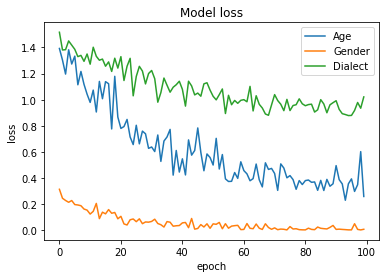

None


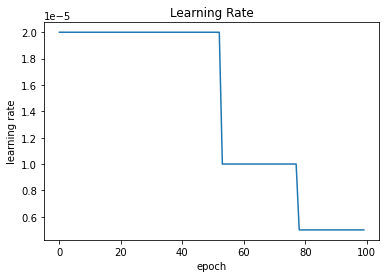

None


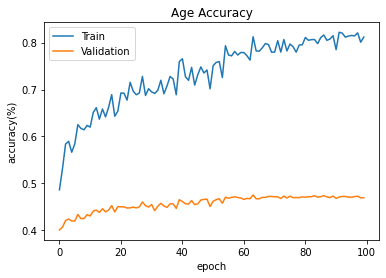

None


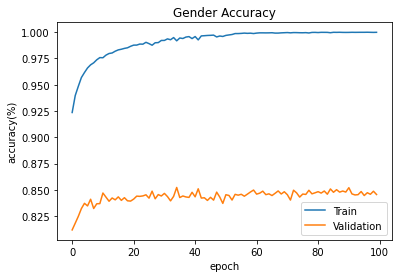

None


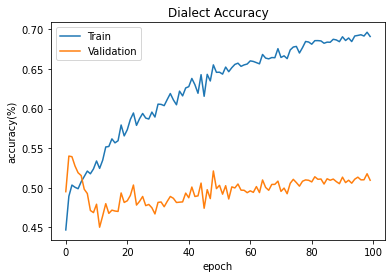

None


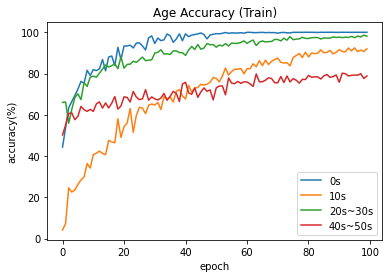

None


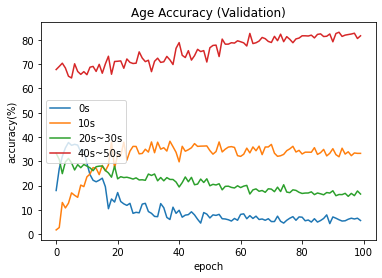

None


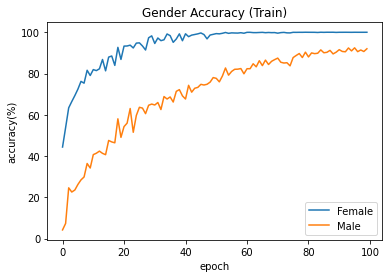

None


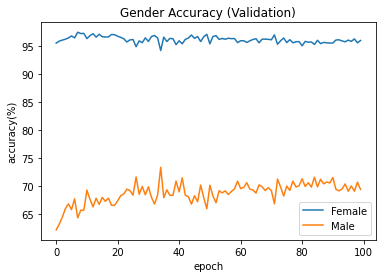

None


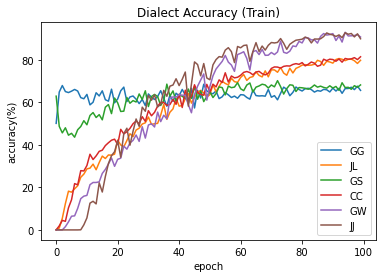

None


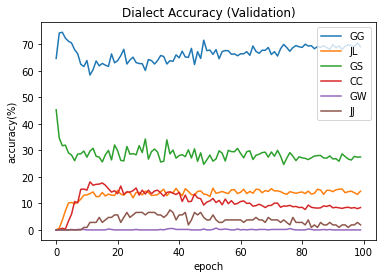

None
Mean Duration for Training per epoch = 104.4951초

---- FINISHED!! ----


In [28]:
# Shared CNN 학습

train(model=model, loader_train=dataloader, loader_valid=dataloader_valid, scheduler=scheduler, 
      tb_path=writer, optimizer=optimizer, epochs=100, batch_size=batch_num)

### **2-1) CLSTM (1차 실험)**

In [160]:
# Hyperparameter 설정

learning_rate = 0.001
model = CLSTM3(batch_size=batch_num)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, threshold=5e-5)
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, threshold=5e-5)
writer = SummaryWriter('/root/runs/CLSTM')

  0%|                                                   | 0/100 [00:00<?, ?it/s]


Checking accuracy on train set
Age     : Got 14791 / 630784 correct (2.34)
Accuracy of  청소년 : 86 %
Accuracy of   청년 :  0 %
Accuracy of  중장년 : 12 %
Accuracy of   노년 :  0 %
Gender  : Got 390539 / 630784 correct (61.91)
Accuracy of   여성 : 100 %
Accuracy of   남성 :  0 %
Dialect : Got 341954 / 630784 correct (54.21)
Accuracy of  수도권 : 100 %
Accuracy of  전라도 :  0 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


  1%|▍                                       | 1/100 [04:51<8:01:14, 291.66s/it]

Age     : Got 1409 / 12288 correct (11.47)
Accuracy of  청소년 : 75 %
Accuracy of   청년 :  0 %
Accuracy of  중장년 : 21 %
Accuracy of   노년 :  0 %
Gender  : Got 7003 / 12288 correct (56.99)
Accuracy of   여성 : 100 %
Accuracy of   남성 :  0 %
Dialect : Got 7974 / 12288 correct (64.89)
Accuracy of  수도권 : 100 %
Accuracy of  전라도 :  0 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



  9%|███▌                                    | 9/100 [21:57<3:19:09, 131.31s/it]


Checking accuracy on train set
Age     : Got 284407 / 630784 correct (45.09)
Accuracy of  청소년 : 42 %
Accuracy of   청년 : 12 %
Accuracy of  중장년 : 50 %
Accuracy of   노년 : 46 %
Gender  : Got 500700 / 630784 correct (79.38)
Accuracy of   여성 : 77 %
Accuracy of   남성 : 81 %
Dialect : Got 311651 / 630784 correct (49.41)
Accuracy of  수도권 : 88 %
Accuracy of  전라도 : 13 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 :  1 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 10%|███▉                                   | 10/100 [26:48<4:30:41, 180.46s/it]

Age     : Got 4779 / 12288 correct (38.89)
Accuracy of  청소년 : 16 %
Accuracy of   청년 :  5 %
Accuracy of  중장년 : 33 %
Accuracy of   노년 : 63 %
Gender  : Got 9536 / 12288 correct (77.60)
Accuracy of   여성 : 80 %
Accuracy of   남성 : 74 %
Dialect : Got 7159 / 12288 correct (58.26)
Accuracy of  수도권 : 88 %
Accuracy of  전라도 :  9 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 19%|███████▍                               | 19/100 [46:01<2:55:34, 130.06s/it]


Checking accuracy on train set
Age     : Got 301570 / 630784 correct (47.81)
Accuracy of  청소년 : 65 %
Accuracy of   청년 : 30 %
Accuracy of  중장년 : 19 %
Accuracy of   노년 : 50 %
Gender  : Got 509140 / 630784 correct (80.72)
Accuracy of   여성 : 78 %
Accuracy of   남성 : 84 %
Dialect : Got 292399 / 630784 correct (46.35)
Accuracy of  수도권 : 81 %
Accuracy of  전라도 :  9 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 : 14 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 20%|███████▊                               | 20/100 [50:55<3:58:59, 179.24s/it]

Age     : Got 4537 / 12288 correct (36.92)
Accuracy of  청소년 : 31 %
Accuracy of   청년 : 15 %
Accuracy of  중장년 : 11 %
Accuracy of   노년 : 66 %
Gender  : Got 9657 / 12288 correct (78.59)
Accuracy of   여성 : 79 %
Accuracy of   남성 : 77 %
Dialect : Got 6678 / 12288 correct (54.35)
Accuracy of  수도권 : 81 %
Accuracy of  전라도 :  7 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 : 10 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 29%|██████████▋                          | 29/100 [1:10:08<2:34:13, 130.34s/it]


Checking accuracy on train set
Age     : Got 296095 / 630784 correct (46.94)
Accuracy of  청소년 : 57 %
Accuracy of   청년 : 37 %
Accuracy of  중장년 : 18 %
Accuracy of   노년 : 49 %
Gender  : Got 511046 / 630784 correct (81.02)
Accuracy of   여성 : 80 %
Accuracy of   남성 : 81 %
Dialect : Got 310860 / 630784 correct (49.28)
Accuracy of  수도권 : 88 %
Accuracy of  전라도 :  4 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 : 10 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 30%|███████████                          | 30/100 [1:14:59<3:28:16, 178.52s/it]

Age     : Got 4587 / 12288 correct (37.33)
Accuracy of  청소년 : 30 %
Accuracy of   청년 : 19 %
Accuracy of  중장년 : 11 %
Accuracy of   노년 : 65 %
Gender  : Got 9668 / 12288 correct (78.68)
Accuracy of   여성 : 83 %
Accuracy of   남성 : 72 %
Dialect : Got 7175 / 12288 correct (58.39)
Accuracy of  수도권 : 88 %
Accuracy of  전라도 :  4 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 :  7 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 39%|██████████████▍                      | 39/100 [1:34:10<2:12:13, 130.05s/it]


Checking accuracy on train set
Age     : Got 297920 / 630784 correct (47.23)
Accuracy of  청소년 : 63 %
Accuracy of   청년 : 32 %
Accuracy of  중장년 : 24 %
Accuracy of   노년 : 49 %
Gender  : Got 510605 / 630784 correct (80.95)
Accuracy of   여성 : 78 %
Accuracy of   남성 : 85 %
Dialect : Got 259488 / 630784 correct (41.14)
Accuracy of  수도권 : 69 %
Accuracy of  전라도 : 16 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 : 24 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 40%|██████████████▊                      | 40/100 [1:39:03<2:59:05, 179.10s/it]

Age     : Got 4544 / 12288 correct (36.98)
Accuracy of  청소년 : 32 %
Accuracy of   청년 : 15 %
Accuracy of  중장년 : 13 %
Accuracy of   노년 : 64 %
Gender  : Got 9668 / 12288 correct (78.68)
Accuracy of   여성 : 79 %
Accuracy of   남성 : 77 %
Dialect : Got 5818 / 12288 correct (47.35)
Accuracy of  수도권 : 69 %
Accuracy of  전라도 : 11 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 : 19 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 49%|██████████████████▏                  | 49/100 [1:58:17<1:50:57, 130.53s/it]


Checking accuracy on train set
Age     : Got 273752 / 630784 correct (43.40)
Accuracy of  청소년 : 60 %
Accuracy of   청년 : 46 %
Accuracy of  중장년 : 15 %
Accuracy of   노년 : 45 %
Gender  : Got 510707 / 630784 correct (80.96)
Accuracy of   여성 : 77 %
Accuracy of   남성 : 87 %
Dialect : Got 300541 / 630784 correct (47.65)
Accuracy of  수도권 : 84 %
Accuracy of  전라도 :  8 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 : 13 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 50%|██████████████████▌                  | 50/100 [2:03:07<2:28:47, 178.56s/it]

Age     : Got 4422 / 12288 correct (35.99)
Accuracy of  청소년 : 31 %
Accuracy of   청년 : 24 %
Accuracy of  중장년 :  8 %
Accuracy of   노년 : 61 %
Gender  : Got 9656 / 12288 correct (78.58)
Accuracy of   여성 : 77 %
Accuracy of   남성 : 79 %
Dialect : Got 6863 / 12288 correct (55.85)
Accuracy of  수도권 : 84 %
Accuracy of  전라도 :  5 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 : 10 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 59%|█████████████████████▊               | 59/100 [2:22:19<1:28:55, 130.12s/it]


Checking accuracy on train set
Age     : Got 294872 / 630784 correct (46.75)
Accuracy of  청소년 : 63 %
Accuracy of   청년 : 33 %
Accuracy of  중장년 : 27 %
Accuracy of   노년 : 48 %
Gender  : Got 523563 / 630784 correct (83.00)
Accuracy of   여성 : 81 %
Accuracy of   남성 : 85 %
Dialect : Got 248787 / 630784 correct (39.44)
Accuracy of  수도권 : 64 %
Accuracy of  전라도 : 20 %
Accuracy of  경상도 :  1 %
Accuracy of  충청도 : 26 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 60%|██████████████████████▏              | 60/100 [2:27:10<1:58:53, 178.35s/it]

Age     : Got 4564 / 12288 correct (37.14)
Accuracy of  청소년 : 32 %
Accuracy of   청년 : 16 %
Accuracy of  중장년 : 15 %
Accuracy of   노년 : 63 %
Gender  : Got 9739 / 12288 correct (79.26)
Accuracy of   여성 : 81 %
Accuracy of   남성 : 76 %
Dialect : Got 5424 / 12288 correct (44.14)
Accuracy of  수도권 : 64 %
Accuracy of  전라도 : 14 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 : 20 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 69%|█████████████████████████▌           | 69/100 [2:46:25<1:07:25, 130.50s/it]


Checking accuracy on train set
Age     : Got 37252 / 630784 correct (5.91)
Accuracy of  청소년 : 48 %
Accuracy of   청년 : 45 %
Accuracy of  중장년 : 10 %
Accuracy of   노년 :  2 %
Gender  : Got 333705 / 630784 correct (52.90)
Accuracy of   여성 : 57 %
Accuracy of   남성 : 46 %
Dialect : Got 308574 / 630784 correct (48.92)
Accuracy of  수도권 : 87 %
Accuracy of  전라도 :  9 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 :  8 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 70%|█████████████████████████▉           | 70/100 [2:51:14<1:28:58, 177.96s/it]

Age     : Got 1991 / 12288 correct (16.20)
Accuracy of  청소년 : 42 %
Accuracy of   청년 : 42 %
Accuracy of  중장년 : 10 %
Accuracy of   노년 :  2 %
Gender  : Got 6190 / 12288 correct (50.37)
Accuracy of   여성 : 55 %
Accuracy of   남성 : 43 %
Dialect : Got 7046 / 12288 correct (57.34)
Accuracy of  수도권 : 87 %
Accuracy of  전라도 :  5 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 :  6 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 79%|██████████████████████████████▊        | 79/100 [3:10:26<45:32, 130.13s/it]


Checking accuracy on train set
Age     : Got 33035 / 630784 correct (5.24)
Accuracy of  청소년 : 53 %
Accuracy of   청년 : 38 %
Accuracy of  중장년 : 25 %
Accuracy of   노년 :  0 %
Gender  : Got 327579 / 630784 correct (51.93)
Accuracy of   여성 : 50 %
Accuracy of   남성 : 54 %
Dialect : Got 249652 / 630784 correct (39.58)
Accuracy of  수도권 : 64 %
Accuracy of  전라도 : 21 %
Accuracy of  경상도 :  2 %
Accuracy of  충청도 : 24 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 80%|███████████████████████████████▏       | 80/100 [3:15:17<59:25, 178.29s/it]

Age     : Got 2189 / 12288 correct (17.81)
Accuracy of  청소년 : 40 %
Accuracy of   청년 : 35 %
Accuracy of  중장년 : 24 %
Accuracy of   노년 :  0 %
Gender  : Got 6030 / 12288 correct (49.07)
Accuracy of   여성 : 47 %
Accuracy of   남성 : 51 %
Dialect : Got 5401 / 12288 correct (43.95)
Accuracy of  수도권 : 63 %
Accuracy of  전라도 : 14 %
Accuracy of  경상도 :  1 %
Accuracy of  충청도 : 16 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 89%|██████████████████████████████████▋    | 89/100 [3:34:33<23:56, 130.63s/it]


Checking accuracy on train set
Age     : Got 27369 / 630784 correct (4.34)
Accuracy of  청소년 : 58 %
Accuracy of   청년 : 49 %
Accuracy of  중장년 :  7 %
Accuracy of   노년 :  0 %
Gender  : Got 318899 / 630784 correct (50.56)
Accuracy of   여성 : 44 %
Accuracy of   남성 : 59 %
Dialect : Got 263710 / 630784 correct (41.81)
Accuracy of  수도권 : 69 %
Accuracy of  전라도 : 18 %
Accuracy of  경상도 :  3 %
Accuracy of  충청도 : 18 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 90%|███████████████████████████████████    | 90/100 [3:39:23<29:44, 178.47s/it]

Age     : Got 1903 / 12288 correct (15.49)
Accuracy of  청소년 : 46 %
Accuracy of   청년 : 46 %
Accuracy of  중장년 :  7 %
Accuracy of   노년 :  0 %
Gender  : Got 5961 / 12288 correct (48.51)
Accuracy of   여성 : 42 %
Accuracy of   남성 : 56 %
Dialect : Got 5748 / 12288 correct (46.78)
Accuracy of  수도권 : 68 %
Accuracy of  전라도 : 12 %
Accuracy of  경상도 :  3 %
Accuracy of  충청도 : 14 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 99%|██████████████████████████████████████▌| 99/100 [3:58:36<02:10, 130.21s/it]


Checking accuracy on train set
Age     : Got 31352 / 630784 correct (4.97)
Accuracy of  청소년 : 55 %
Accuracy of   청년 : 40 %
Accuracy of  중장년 : 24 %
Accuracy of   노년 :  0 %
Gender  : Got 326552 / 630784 correct (51.77)
Accuracy of   여성 : 48 %
Accuracy of   남성 : 57 %
Dialect : Got 246679 / 630784 correct (39.11)
Accuracy of  수도권 : 62 %
Accuracy of  전라도 : 21 %
Accuracy of  경상도 :  4 %
Accuracy of  충청도 : 25 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


100%|██████████████████████████████████████| 100/100 [4:03:26<00:00, 146.07s/it]

Age     : Got 2168 / 12288 correct (17.64)
Accuracy of  청소년 : 41 %
Accuracy of   청년 : 36 %
Accuracy of  중장년 : 22 %
Accuracy of   노년 :  0 %
Gender  : Got 5996 / 12288 correct (48.80)
Accuracy of   여성 : 45 %
Accuracy of   남성 : 52 %
Dialect : Got 5307 / 12288 correct (43.19)
Accuracy of  수도권 : 61 %
Accuracy of  전라도 : 14 %
Accuracy of  경상도 :  4 %
Accuracy of  충청도 : 18 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



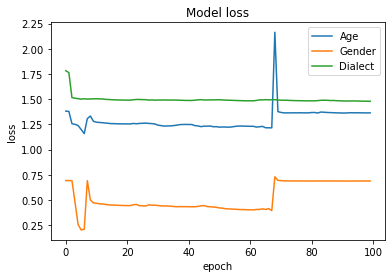

None


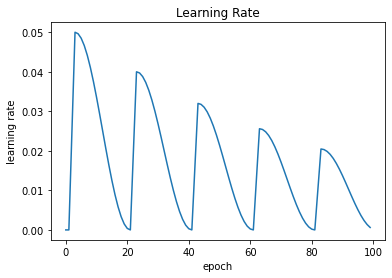

None


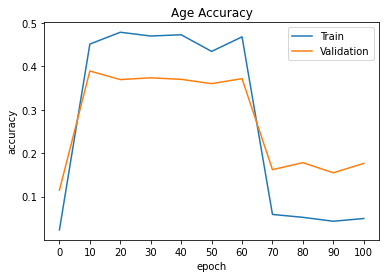

None


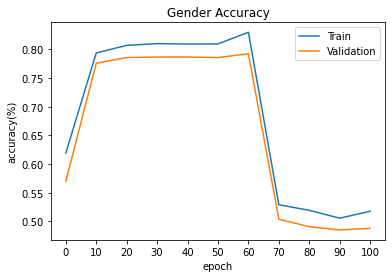

None


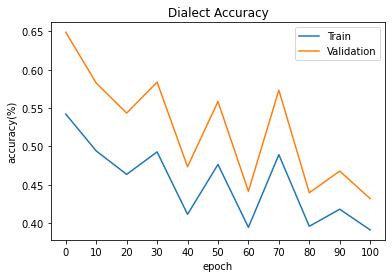

None


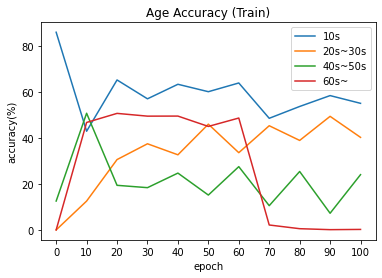

None


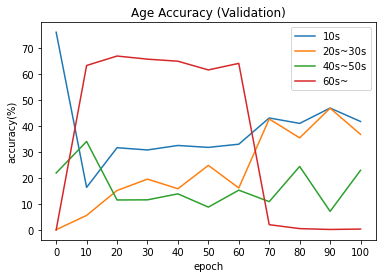

None


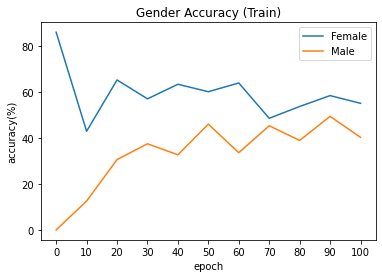

None


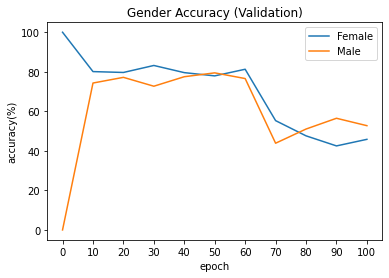

None


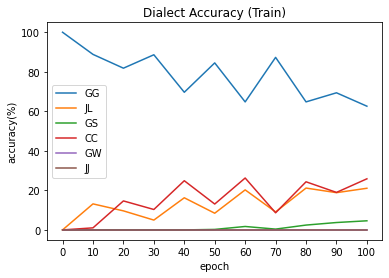

None


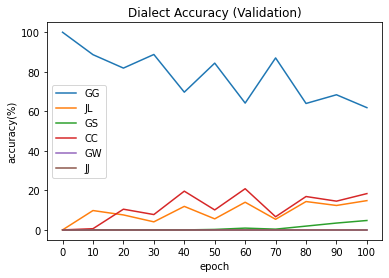

None
Mean Duration for Training per epoch = 128.0697초

---- FINISHED!! ----


In [161]:
# CLSTM
##############################
"""배치 사이즈부터 바꿔야됨"""
##############################
train(model=model, loader_train=dataloader, loader_valid=dataloader_valid, scheduler=scheduler, 
      tb_path=writer, optimizer=optimizer, epochs=100, batch_size=batch_num, print_every=10, model_name='CLSTM_Adam2')

### **2-2) CLSTM (2차 실험)**

In [158]:
# Hyperparameter 설정

learning_rate = 0.01
model = CLSTM3(batch_size=batch_num)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
scheduler = CosineAnnealingWarmupRestarts(optimizer, first_cycle_steps=20, cycle_mult=1.0, max_lr=0.05, min_lr=0.00001, warmup_steps=2, gamma=0.8)
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, threshold=5e-5)
writer = SummaryWriter('/root/runs/CLSTM')

  0%|                                                   | 0/100 [00:00<?, ?it/s]


Checking accuracy on train set
Age     : Got 61595 / 630784 correct (9.76)
Accuracy of  청소년 :  0 %
Accuracy of   청년 : 40 %
Accuracy of  중장년 : 56 %
Accuracy of   노년 :  4 %
Gender  : Got 240245 / 630784 correct (38.09)
Accuracy of   여성 :  0 %
Accuracy of   남성 : 100 %
Dialect : Got 56457 / 630784 correct (8.95)
Accuracy of  수도권 :  0 %
Accuracy of  전라도 : 100 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


  1%|▍                                       | 1/100 [04:53<8:03:37, 293.11s/it]

Age     : Got 2968 / 12288 correct (24.15)
Accuracy of  청소년 :  0 %
Accuracy of   청년 : 60 %
Accuracy of  중장년 : 31 %
Accuracy of   노년 :  3 %
Gender  : Got 5285 / 12288 correct (43.01)
Accuracy of   여성 :  0 %
Accuracy of   남성 : 100 %
Dialect : Got 857 / 12288 correct (6.97)
Accuracy of  수도권 :  0 %
Accuracy of  전라도 : 100 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



  9%|███▌                                    | 9/100 [21:55<3:18:21, 130.78s/it]


Checking accuracy on train set
Age     : Got 428885 / 630784 correct (67.99)
Accuracy of  청소년 : 48 %
Accuracy of   청년 : 41 %
Accuracy of  중장년 : 25 %
Accuracy of   노년 : 73 %
Gender  : Got 588795 / 630784 correct (93.34)
Accuracy of   여성 : 92 %
Accuracy of   남성 : 95 %
Dialect : Got 323568 / 630784 correct (51.30)
Accuracy of  수도권 : 83 %
Accuracy of  전라도 :  0 %
Accuracy of  경상도 : 22 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 10%|███▉                                   | 10/100 [26:48<4:31:22, 180.91s/it]

Age     : Got 5350 / 12288 correct (43.54)
Accuracy of  청소년 : 12 %
Accuracy of   청년 : 22 %
Accuracy of  중장년 : 10 %
Accuracy of   노년 : 82 %
Gender  : Got 10574 / 12288 correct (86.05)
Accuracy of   여성 : 92 %
Accuracy of   남성 : 77 %
Dialect : Got 7078 / 12288 correct (57.60)
Accuracy of  수도권 : 84 %
Accuracy of  전라도 :  0 %
Accuracy of  경상도 : 17 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 19%|███████▍                               | 19/100 [46:01<2:56:08, 130.48s/it]


Checking accuracy on train set
Age     : Got 365512 / 630784 correct (57.95)
Accuracy of  청소년 : 71 %
Accuracy of   청년 : 40 %
Accuracy of  중장년 : 40 %
Accuracy of   노년 : 60 %
Gender  : Got 602168 / 630784 correct (95.46)
Accuracy of   여성 : 96 %
Accuracy of   남성 : 94 %
Dialect : Got 317372 / 630784 correct (50.31)
Accuracy of  수도권 : 82 %
Accuracy of  전라도 :  1 %
Accuracy of  경상도 : 18 %
Accuracy of  충청도 :  5 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 20%|███████▊                               | 20/100 [50:51<3:58:02, 178.53s/it]

Age     : Got 5188 / 12288 correct (42.22)
Accuracy of  청소년 : 22 %
Accuracy of   청년 : 24 %
Accuracy of  중장년 : 21 %
Accuracy of   노년 : 68 %
Gender  : Got 10564 / 12288 correct (85.97)
Accuracy of   여성 : 93 %
Accuracy of   남성 : 76 %
Dialect : Got 6879 / 12288 correct (55.98)
Accuracy of  수도권 : 81 %
Accuracy of  전라도 :  3 %
Accuracy of  경상도 : 15 %
Accuracy of  충청도 :  3 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 29%|██████████▋                          | 29/100 [1:10:02<2:33:21, 129.60s/it]


Checking accuracy on train set
Age     : Got 367811 / 630784 correct (58.31)
Accuracy of  청소년 : 70 %
Accuracy of   청년 : 40 %
Accuracy of  중장년 : 40 %
Accuracy of   노년 : 60 %
Gender  : Got 595107 / 630784 correct (94.34)
Accuracy of   여성 : 93 %
Accuracy of   남성 : 95 %
Dialect : Got 308717 / 630784 correct (48.94)
Accuracy of  수도권 : 76 %
Accuracy of  전라도 :  2 %
Accuracy of  경상도 : 23 %
Accuracy of  충청도 :  6 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 30%|███████████                          | 30/100 [1:14:55<3:28:28, 178.70s/it]

Age     : Got 5205 / 12288 correct (42.36)
Accuracy of  청소년 : 27 %
Accuracy of   청년 : 29 %
Accuracy of  중장년 : 19 %
Accuracy of   노년 : 67 %
Gender  : Got 10820 / 12288 correct (88.05)
Accuracy of   여성 : 94 %
Accuracy of   남성 : 79 %
Dialect : Got 6491 / 12288 correct (52.82)
Accuracy of  수도권 : 75 %
Accuracy of  전라도 :  5 %
Accuracy of  경상도 : 18 %
Accuracy of  충청도 :  3 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 39%|██████████████▍                      | 39/100 [1:34:07<2:12:33, 130.38s/it]


Checking accuracy on train set
Age     : Got 351620 / 630784 correct (55.74)
Accuracy of  청소년 : 79 %
Accuracy of   청년 : 44 %
Accuracy of  중장년 : 44 %
Accuracy of   노년 : 56 %
Gender  : Got 602076 / 630784 correct (95.45)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 95 %
Dialect : Got 304609 / 630784 correct (48.29)
Accuracy of  수도권 : 77 %
Accuracy of  전라도 :  2 %
Accuracy of  경상도 : 19 %
Accuracy of  충청도 : 11 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 40%|██████████████▊                      | 40/100 [1:38:58<2:58:32, 178.54s/it]

Age     : Got 5092 / 12288 correct (41.44)
Accuracy of  청소년 : 28 %
Accuracy of   청년 : 32 %
Accuracy of  중장년 : 23 %
Accuracy of   노년 : 60 %
Gender  : Got 10819 / 12288 correct (88.05)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 78 %
Dialect : Got 6411 / 12288 correct (52.17)
Accuracy of  수도권 : 74 %
Accuracy of  전라도 :  6 %
Accuracy of  경상도 : 16 %
Accuracy of  충청도 :  8 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 49%|██████████████████▏                  | 49/100 [1:58:10<1:50:34, 130.09s/it]


Checking accuracy on train set
Age     : Got 347309 / 630784 correct (55.06)
Accuracy of  청소년 : 78 %
Accuracy of   청년 : 47 %
Accuracy of  중장년 : 45 %
Accuracy of   노년 : 55 %
Gender  : Got 603277 / 630784 correct (95.64)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 95 %
Dialect : Got 315898 / 630784 correct (50.08)
Accuracy of  수도권 : 79 %
Accuracy of  전라도 :  3 %
Accuracy of  경상도 : 23 %
Accuracy of  충청도 :  4 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 50%|██████████████████▌                  | 50/100 [2:03:00<2:28:30, 178.21s/it]

Age     : Got 5035 / 12288 correct (40.97)
Accuracy of  청소년 : 28 %
Accuracy of   청년 : 36 %
Accuracy of  중장년 : 23 %
Accuracy of   노년 : 57 %
Gender  : Got 10901 / 12288 correct (88.71)
Accuracy of   여성 : 94 %
Accuracy of   남성 : 80 %
Dialect : Got 6587 / 12288 correct (53.61)
Accuracy of  수도권 : 76 %
Accuracy of  전라도 :  6 %
Accuracy of  경상도 : 17 %
Accuracy of  충청도 :  4 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 59%|█████████████████████▊               | 59/100 [2:22:14<1:28:59, 130.24s/it]


Checking accuracy on train set
Age     : Got 367953 / 630784 correct (58.33)
Accuracy of  청소년 : 79 %
Accuracy of   청년 : 48 %
Accuracy of  중장년 : 46 %
Accuracy of   노년 : 59 %
Gender  : Got 604959 / 630784 correct (95.91)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 96 %
Dialect : Got 299898 / 630784 correct (47.54)
Accuracy of  수도권 : 73 %
Accuracy of  전라도 :  8 %
Accuracy of  경상도 : 22 %
Accuracy of  충청도 :  9 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 60%|██████████████████████▏              | 60/100 [2:27:05<1:59:00, 178.52s/it]

Age     : Got 5064 / 12288 correct (41.21)
Accuracy of  청소년 : 28 %
Accuracy of   청년 : 36 %
Accuracy of  중장년 : 23 %
Accuracy of   노년 : 58 %
Gender  : Got 11020 / 12288 correct (89.68)
Accuracy of   여성 : 94 %
Accuracy of   남성 : 83 %
Dialect : Got 6002 / 12288 correct (48.84)
Accuracy of  수도권 : 68 %
Accuracy of  전라도 :  9 %
Accuracy of  경상도 : 18 %
Accuracy of  충청도 :  7 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 69%|█████████████████████████▌           | 69/100 [2:46:17<1:07:11, 130.06s/it]


Checking accuracy on train set
Age     : Got 393342 / 630784 correct (62.36)
Accuracy of  청소년 : 72 %
Accuracy of   청년 : 45 %
Accuracy of  중장년 : 49 %
Accuracy of   노년 : 64 %
Gender  : Got 605282 / 630784 correct (95.96)
Accuracy of   여성 : 96 %
Accuracy of   남성 : 95 %
Dialect : Got 272427 / 630784 correct (43.19)
Accuracy of  수도권 : 60 %
Accuracy of  전라도 : 22 %
Accuracy of  경상도 : 28 %
Accuracy of  충청도 :  6 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 70%|█████████████████████████▉           | 70/100 [2:51:07<1:29:04, 178.15s/it]

Age     : Got 5342 / 12288 correct (43.47)
Accuracy of  청소년 : 22 %
Accuracy of   청년 : 36 %
Accuracy of  중장년 : 22 %
Accuracy of   노년 : 65 %
Gender  : Got 10905 / 12288 correct (88.75)
Accuracy of   여성 : 94 %
Accuracy of   남성 : 80 %
Dialect : Got 5320 / 12288 correct (43.29)
Accuracy of  수도권 : 58 %
Accuracy of  전라도 : 16 %
Accuracy of  경상도 : 23 %
Accuracy of  충청도 :  3 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 79%|██████████████████████████████▊        | 79/100 [3:10:21<45:37, 130.37s/it]


Checking accuracy on train set
Age     : Got 366743 / 630784 correct (58.14)
Accuracy of  청소년 : 81 %
Accuracy of   청년 : 49 %
Accuracy of  중장년 : 48 %
Accuracy of   노년 : 58 %
Gender  : Got 605614 / 630784 correct (96.01)
Accuracy of   여성 : 95 %
Accuracy of   남성 : 96 %
Dialect : Got 277028 / 630784 correct (43.92)
Accuracy of  수도권 : 64 %
Accuracy of  전라도 : 24 %
Accuracy of  경상도 : 22 %
Accuracy of  충청도 :  6 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 80%|███████████████████████████████▏       | 80/100 [3:15:13<59:32, 178.65s/it]

Age     : Got 5146 / 12288 correct (41.88)
Accuracy of  청소년 : 26 %
Accuracy of   청년 : 38 %
Accuracy of  중장년 : 22 %
Accuracy of   노년 : 59 %
Gender  : Got 10904 / 12288 correct (88.74)
Accuracy of   여성 : 94 %
Accuracy of   남성 : 81 %
Dialect : Got 5480 / 12288 correct (44.60)
Accuracy of  수도권 : 61 %
Accuracy of  전라도 : 19 %
Accuracy of  경상도 : 18 %
Accuracy of  충청도 :  4 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 89%|██████████████████████████████████▋    | 89/100 [3:34:25<23:50, 130.04s/it]


Checking accuracy on train set
Age     : Got 371296 / 630784 correct (58.86)
Accuracy of  청소년 : 79 %
Accuracy of   청년 : 47 %
Accuracy of  중장년 : 51 %
Accuracy of   노년 : 59 %
Gender  : Got 607117 / 630784 correct (96.25)
Accuracy of   여성 : 96 %
Accuracy of   남성 : 95 %
Dialect : Got 270721 / 630784 correct (42.92)
Accuracy of  수도권 : 62 %
Accuracy of  전라도 : 29 %
Accuracy of  경상도 : 21 %
Accuracy of  충청도 :  6 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


 90%|███████████████████████████████████    | 90/100 [3:39:16<29:44, 178.45s/it]

Age     : Got 5249 / 12288 correct (42.72)
Accuracy of  청소년 : 28 %
Accuracy of   청년 : 38 %
Accuracy of  중장년 : 23 %
Accuracy of   노년 : 60 %
Gender  : Got 10876 / 12288 correct (88.51)
Accuracy of   여성 : 93 %
Accuracy of   남성 : 81 %
Dialect : Got 5213 / 12288 correct (42.42)
Accuracy of  수도권 : 57 %
Accuracy of  전라도 : 23 %
Accuracy of  경상도 : 19 %
Accuracy of  충청도 :  4 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 99%|██████████████████████████████████████▌| 99/100 [3:58:32<02:10, 130.64s/it]


Checking accuracy on train set
Age     : Got 372647 / 630784 correct (59.08)
Accuracy of  청소년 : 82 %
Accuracy of   청년 : 51 %
Accuracy of  중장년 : 49 %
Accuracy of   노년 : 59 %
Gender  : Got 606959 / 630784 correct (96.22)
Accuracy of   여성 : 96 %
Accuracy of   남성 : 96 %
Dialect : Got 266597 / 630784 correct (42.26)
Accuracy of  수도권 : 60 %
Accuracy of  전라도 : 31 %
Accuracy of  경상도 : 21 %
Accuracy of  충청도 :  7 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


100%|██████████████████████████████████████| 100/100 [4:03:22<00:00, 146.03s/it]

Age     : Got 5202 / 12288 correct (42.33)
Accuracy of  청소년 : 26 %
Accuracy of   청년 : 40 %
Accuracy of  중장년 : 22 %
Accuracy of   노년 : 59 %
Gender  : Got 10874 / 12288 correct (88.49)
Accuracy of   여성 : 93 %
Accuracy of   남성 : 81 %
Dialect : Got 5103 / 12288 correct (41.53)
Accuracy of  수도권 : 55 %
Accuracy of  전라도 : 27 %
Accuracy of  경상도 : 17 %
Accuracy of  충청도 :  6 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



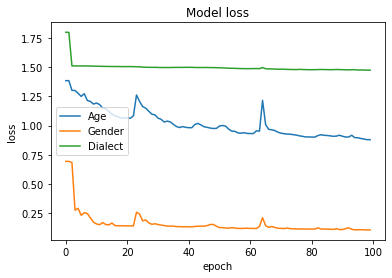

None


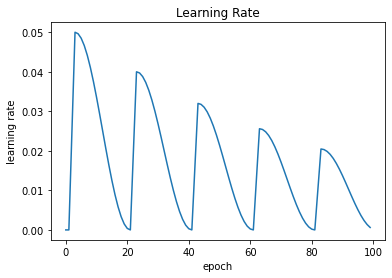

None


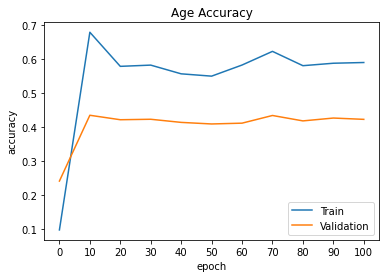

None


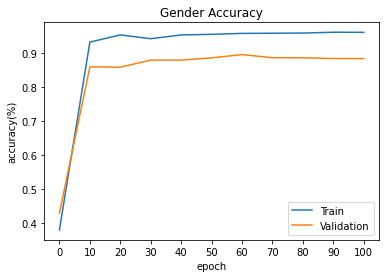

None


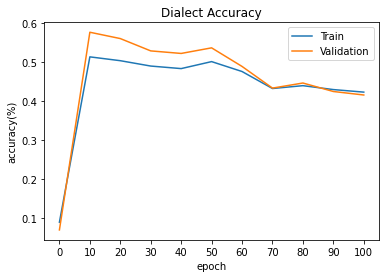

None


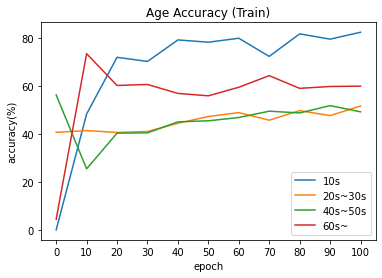

None


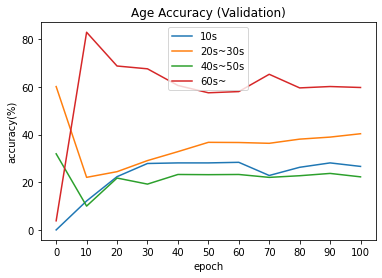

None


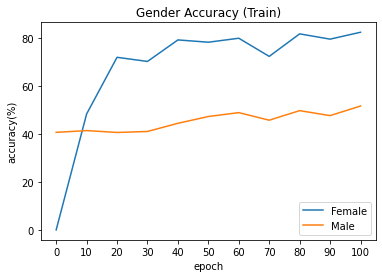

None


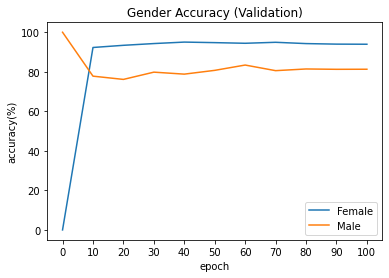

None


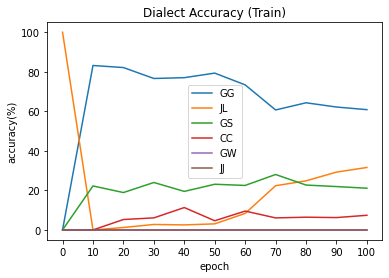

None


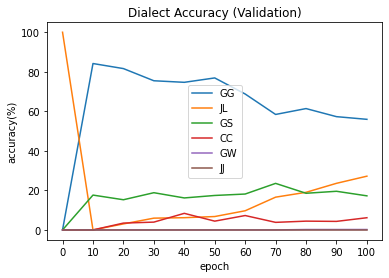

None
Mean Duration for Training per epoch = 128.0123초

---- FINISHED!! ----


In [159]:
# CLSTM

train(model=model, loader_train=dataloader, loader_valid=dataloader_valid, scheduler=scheduler, 
      tb_path=writer, optimizer=optimizer, epochs=100, batch_size=batch_num, print_every=10, model_name='CLSTM_SGD')

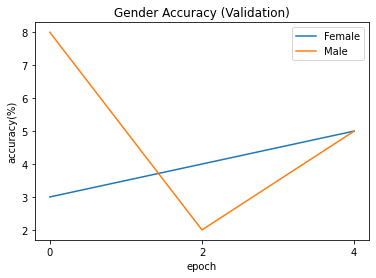

In [148]:
import matplotlib.pyplot as plt
gender_class_val_ac = {'여성': [3, 4, 5], '남성': [8, 2, 5]}
df_gender_val = pd.DataFrame(gender_class_val_ac)
df_gender_val.plot(xlabel="epoch", ylabel="accuracy(%)")
plt.xticks(list(range(df_gender_val.shape[0])), labels=list(range(0, 5, 2)))
plt.legend(['Female', 'Male'])
plt.title("Gender Accuracy (Validation)")
plt.show()

In [141]:
list(range(df_gender_val.shape[0]))

[0, 1, 2]

## **성별 베이스라인**

Iteration 1 --- Train Loss = 0.7180
Iteration 501 --- Train Loss = 0.6898
Epoch 1 finished --- Duration : 87.2619초
Checking accuracy on train set
Gender  : Got 383119 / 633856 correct (60.44)
Accuracy of   여성 : 91 %
Accuracy of   남성 : 11 %

Duration : 0.000007초 (per input)

Checking accuracy on validation set
Gender  : Got 7381 / 13312 correct (55.45)
Accuracy of   여성 : 76 %
Accuracy of   남성 : 16 %

Duration : 0.000007초 (per input)

Iteration 1 --- Train Loss = 0.6903
Iteration 501 --- Train Loss = 0.6938
Epoch 2 finished --- Duration : 86.4918초
Checking accuracy on train set
Gender  : Got 392422 / 633856 correct (61.91)
Accuracy of   여성 : 100 %
Accuracy of   남성 :  0 %

Duration : 0.000007초 (per input)

Checking accuracy on validation set
Gender  : Got 7589 / 13312 correct (57.01)
Accuracy of   여성 : 100 %
Accuracy of   남성 :  0 %

Duration : 0.000007초 (per input)

Iteration 1 --- Train Loss = 0.6940
Iteration 501 --- Train Loss = 0.6939
Epoch 3 finished --- Duration : 86.7145초
Checking 

Gender  : Got 6851 / 13312 correct (51.46)
Accuracy of   여성 : 28 %
Accuracy of   남성 : 77 %

Duration : 0.000008초 (per input)

Iteration 1 --- Train Loss = 0.6928
Iteration 501 --- Train Loss = 0.6965
Epoch 20 finished --- Duration : 87.6545초
Checking accuracy on train set
Gender  : Got 257638 / 633856 correct (40.65)
Accuracy of   여성 :  6 %
Accuracy of   남성 : 94 %

Duration : 0.000007초 (per input)

Checking accuracy on validation set
Gender  : Got 6714 / 13312 correct (50.44)
Accuracy of   여성 : 14 %
Accuracy of   남성 : 88 %

Duration : 0.000007초 (per input)

Iteration 1 --- Train Loss = 0.6926
Iteration 501 --- Train Loss = 0.6943
Epoch 21 finished --- Duration : 83.1574초
Checking accuracy on train set
Gender  : Got 266147 / 633856 correct (41.99)
Accuracy of   여성 : 13 %
Accuracy of   남성 : 86 %

Duration : 0.000007초 (per input)

Checking accuracy on validation set
Gender  : Got 6885 / 13312 correct (51.72)
Accuracy of   여성 : 28 %
Accuracy of   남성 : 77 %

Duration : 0.000007초 (per input)

Gender  : Got 6847 / 13312 correct (51.43)
Accuracy of   여성 : 28 %
Accuracy of   남성 : 77 %

Duration : 0.000007초 (per input)

Iteration 1 --- Train Loss = 0.6927
Iteration 501 --- Train Loss = 0.6930
Epoch 39 finished --- Duration : 88.2880초
Checking accuracy on train set
Gender  : Got 264773 / 633856 correct (41.77)
Accuracy of   여성 : 13 %
Accuracy of   남성 : 85 %

Duration : 0.000007초 (per input)

Checking accuracy on validation set
Gender  : Got 6847 / 13312 correct (51.43)
Accuracy of   여성 : 28 %
Accuracy of   남성 : 77 %

Duration : 0.000007초 (per input)

Iteration 1 --- Train Loss = 0.6927
Iteration 501 --- Train Loss = 0.6931
Epoch 40 finished --- Duration : 90.7527초
Checking accuracy on train set
Gender  : Got 264773 / 633856 correct (41.77)
Accuracy of   여성 : 13 %
Accuracy of   남성 : 85 %

Duration : 0.000007초 (per input)

Checking accuracy on validation set
Gender  : Got 6847 / 13312 correct (51.43)
Accuracy of   여성 : 28 %
Accuracy of   남성 : 77 %

Duration : 0.000007초 (per input)

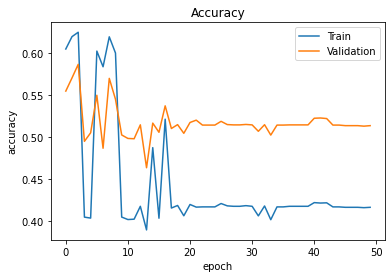

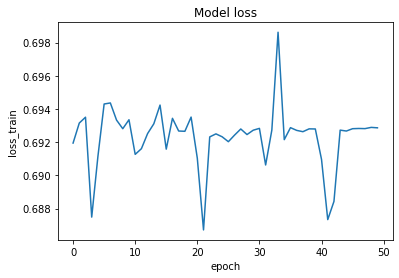

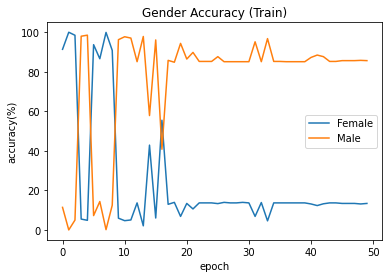

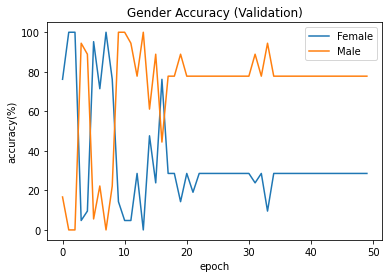

Mean Duration for Training per epoch = 85.2512초

---- FINISHED!! ----


In [42]:
learning_rate = 1e-2

model = RNN_G(batch_size=batch_num)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_G(model=model, loader_train=dataloader, loader_valid=dataloader_valid,
      tb_path=writer, optimizer=optimizer, epochs=50, batch_size=batch_num)

## **방언**

In [8]:
writer = SummaryWriter('/root/runs/CLSTM')

 98%|██████████████████████████████████████████▏| 49/50 [42:25<00:51, 51.73s/it]

Checking accuracy on train set
[343750.0, 56759.0, 176835.0, 49191.0, 5646.0, 1931.0]
Dialect : Got 427363 / 634112 correct (67.40)
Accuracy of  수도권 : 83 %
Accuracy of  전라도 : 20 %
Accuracy of  경상도 : 63 %
Accuracy of  충청도 : 26 %
Accuracy of  강원도 : 30 %
Accuracy of  제주도 :  0 %

Duration : 0.00000023초 (per input)

Checking accuracy on validation set


100%|███████████████████████████████████████████| 50/50 [44:24<00:00, 53.30s/it]

[9198.0, 984.0, 2389.0, 960.0, 571.0, 106.0]
Dialect : Got 7791 / 14208 correct (54.84)
Accuracy of  수도권 : 75 %
Accuracy of  전라도 :  5 %
Accuracy of  경상도 : 29 %
Accuracy of  충청도 :  8 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000026초 (per input)



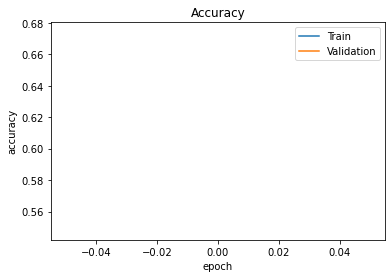

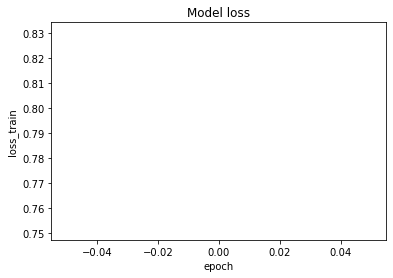

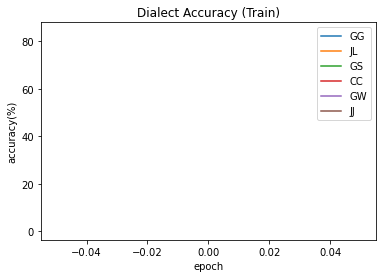

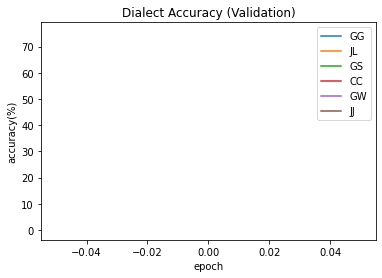

Mean Duration for Training per epoch = 51.9576초

---- FINISHED!! ----


In [9]:
batch_num = 128 # batch size 지정
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_num, pin_memory=True, drop_last=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_num, pin_memory=True, drop_last=True)
learning_rate = 1e-2

model = CNN_D()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_D(model=model, loader_train=dataloader, loader_valid=dataloader_valid,
      tb_path=writer, optimizer=optimizer, epochs=50, batch_size=batch_num, print_every=50)

In [15]:
batch_num = 1024 # batch size 지정
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_num, pin_memory=True, drop_last=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_num, pin_memory=True, drop_last=True)

learning_rate = 1e-2

model = RNN_D(batch_size=batch_num)
model.to(torch.device('cuda:2'))
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_D(model=model, loader_train=dataloader, loader_valid=dataloader_valid,
      tb_path=writer, optimizer=optimizer, epochs=50, batch_size=batch_num, print_every=50)

  0%|                                                    | 0/50 [00:00<?, ?it/s]


RuntimeError: Input and hidden tensors are not at the same device, found input tensor at cuda:2 and hidden tensor at cpu

 98%|███████████████████████████████████████▏| 49/50 [1:28:37<01:50, 110.38s/it]

Checking accuracy on train set
[343611.0, 56729.0, 176771.0, 49169.0, 5646.0, 1930.0]
Dialect : Got 343611 / 633856 correct (54.21)
Accuracy of  수도권 : 100 %
Accuracy of  전라도 :  0 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000004초 (per input)

Checking accuracy on validation set


100%|████████████████████████████████████████| 50/50 [1:32:01<00:00, 110.44s/it]

[8651.0, 919.0, 2234.0, 887.0, 522.0, 99.0]
Dialect : Got 8651 / 13312 correct (64.99)
Accuracy of  수도권 : 100 %
Accuracy of  전라도 :  0 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 :  0 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000004초 (per input)



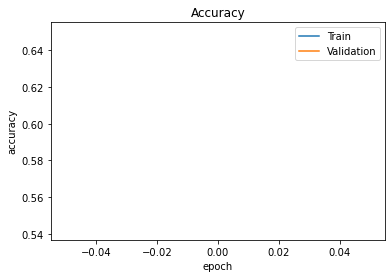

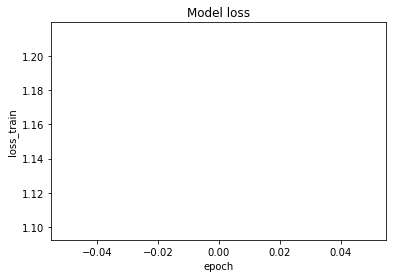

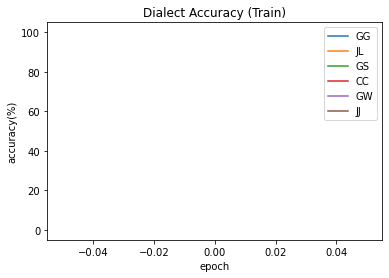

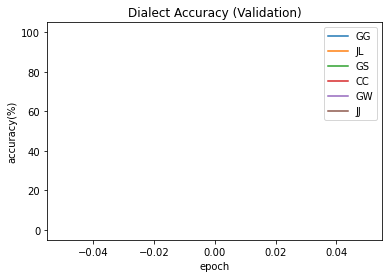

Mean Duration for Training per epoch = 108.5523초

---- FINISHED!! ----


In [14]:
batch_num = 1024 # batch size 지정
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_num, pin_memory=True, drop_last=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_num, pin_memory=True, drop_last=True)

learning_rate = 1e-3

model = CnnLSTM_Dialect(batch_size=batch_num)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
train_D(model=model, loader_train=dataloader, loader_valid=dataloader_valid,
      tb_path=writer, optimizer=optimizer, epochs=50, batch_size=batch_num, print_every=50)

  0%|                                                   | 0/100 [00:00<?, ?it/s]


Checking accuracy on train set
Age     : Got 3396 / 61440 correct (5.53)
Accuracy of  청소년 :  0 %
Accuracy of   청년 : 100 %
Accuracy of  중장년 :  0 %
Accuracy of   노년 :  0 %
Gender  : Got 38108 / 61440 correct (62.02)
Accuracy of   여성 : 100 %
Accuracy of   남성 :  0 %
Dialect : Got 4798 / 61440 correct (7.81)
Accuracy of  수도권 :  0 %
Accuracy of  전라도 :  0 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 : 100 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000003초 (per input)


Checking accuracy on validation set


  1%|▍                                          | 1/100 [00:32<53:40, 32.53s/it]

Age     : Got 2687 / 12288 correct (21.87)
Accuracy of  청소년 :  0 %
Accuracy of   청년 : 100 %
Accuracy of  중장년 :  0 %
Accuracy of   노년 :  0 %
Gender  : Got 7003 / 12288 correct (56.99)
Accuracy of   여성 : 100 %
Accuracy of   남성 :  0 %
Dialect : Got 811 / 12288 correct (6.60)
Accuracy of  수도권 :  0 %
Accuracy of  전라도 :  0 %
Accuracy of  경상도 :  0 %
Accuracy of  충청도 : 100 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



 99%|█████████████████████████████████████████▌| 99/100 [17:11<00:10, 10.22s/it]


Checking accuracy on train set
Age     : Got 26508 / 61440 correct (43.14)
Accuracy of  청소년 : 90 %
Accuracy of   청년 : 43 %
Accuracy of  중장년 : 20 %
Accuracy of   노년 : 43 %
Gender  : Got 57868 / 61440 correct (94.19)
Accuracy of   여성 : 97 %
Accuracy of   남성 : 88 %
Dialect : Got 31104 / 61440 correct (50.62)
Accuracy of  수도권 : 86 %
Accuracy of  전라도 :  1 %
Accuracy of  경상도 : 10 %
Accuracy of  충청도 :  8 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)


Checking accuracy on validation set


100%|█████████████████████████████████████████| 100/100 [17:36<00:00, 10.57s/it]

Age     : Got 4284 / 12288 correct (34.86)
Accuracy of  청소년 : 38 %
Accuracy of   청년 : 33 %
Accuracy of  중장년 : 15 %
Accuracy of   노년 : 48 %
Gender  : Got 10709 / 12288 correct (87.15)
Accuracy of   여성 : 97 %
Accuracy of   남성 : 73 %
Dialect : Got 7149 / 12288 correct (58.18)
Accuracy of  수도권 : 86 %
Accuracy of  전라도 :  1 %
Accuracy of  경상도 :  9 %
Accuracy of  충청도 :  6 %
Accuracy of  강원도 :  0 %
Accuracy of  제주도 :  0 %

Duration : 0.00000002초 (per input)



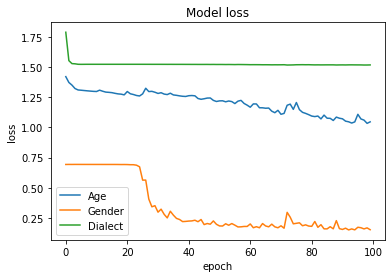

None


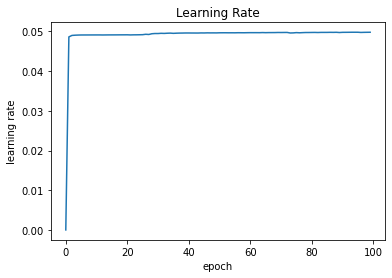

None


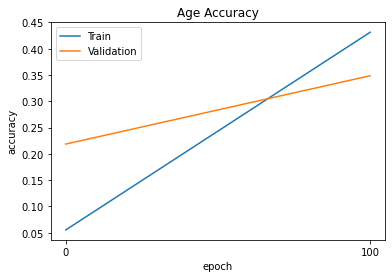

None


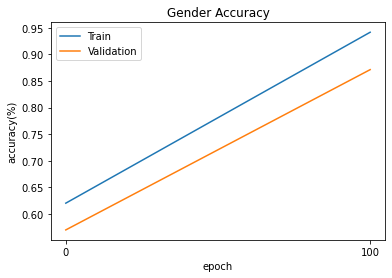

None


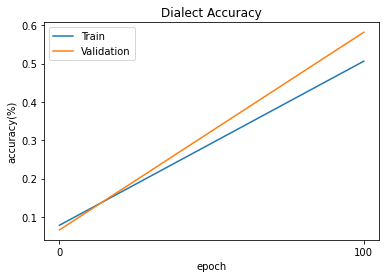

None


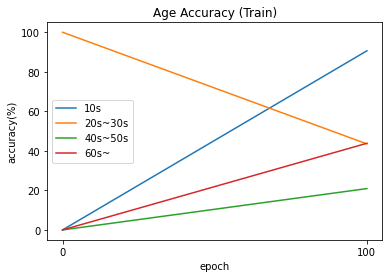

None


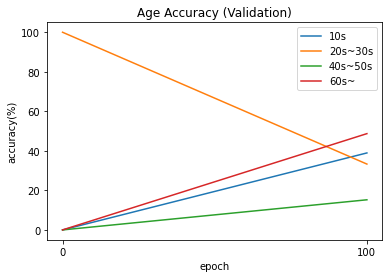

None


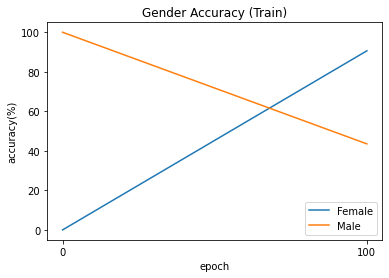

None


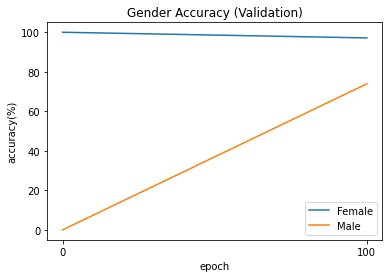

None


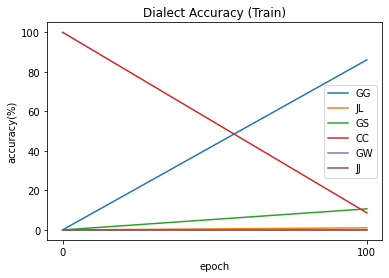

None


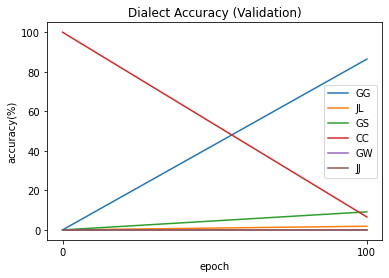

None
Mean Duration for Training per epoch = 10.2613초

---- FINISHED!! ----


In [6]:
# Data Loader 설정

batch_num = 4096 # batch size 지정
dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_num, pin_memory=True, drop_last=True)
dataloader_valid = torch.utils.data.DataLoader(dataset_valid, batch_size=batch_num, pin_memory=True, drop_last=True)

# Hyperparameter 설정

learning_rate = 0.01
model = CLSTM_Fin()
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
scheduler = CosineAnnealingWarmupRestarts(optimizer, first_cycle_steps=20, cycle_mult=1.0, max_lr=0.05, min_lr=0.00001, warmup_steps=2, gamma=0.8)
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.5, patience=10, threshold=5e-5)
writer = SummaryWriter('/root/runs/CLSTM')
# CLSTM

train(model=model, loader_train=dataloader, loader_valid=dataloader_valid, scheduler=scheduler, 
      tb_path=writer, optimizer=optimizer, epochs=100, batch_size=batch_num, print_every=100, model_name='CLSTM_SGD_Fin')

In [ ]:
import gc
model = None
gc.collect()
torch.cuda.empty_cache()

## **연령**

In [212]:
learning_rate = 1e-2

model = CNN_A()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_A(model=model, loader_train=dataloader, loader_valid=dataloader_valid,
      tb_path=writer, optimizer=optimizer, epochs=2, batch_size=batch_num, print_every=2)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [213]:
learning_rate = 1e-2

model = RNN_A(batch_size=batch_num)
optimizer = optim.Adam(model.parameters(), lr=learning_rate)
train_A(model=model, loader_train=dataloader, loader_valid=dataloader_valid,
      tb_path=writer, optimizer=optimizer, epochs=50, batch_size=batch_num, print_every=50)

RuntimeError: CUDA error: device-side assert triggered
CUDA kernel errors might be asynchronously reported at some other API call,so the stacktrace below might be incorrect.
For debugging consider passing CUDA_LAUNCH_BLOCKING=1.

In [ ]:
learning_rate = 1e-3

model = CnnLSTM_Age(batch_size=batch_num)
optimizer = optim.SGD(model.parameters(), lr=learning_rate, momentum=0.9)
train_A(model=model, loader_train=dataloader, loader_valid=dataloader_valid,
      tb_path=writer, optimizer=optimizer, epochs=50, batch_size=batch_num, print_every=50)